# **Исследование объявлений о продаже квартир**
Имеем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определять рыночную стоимость объектов недвижимости. 
Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

> По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
*  *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
*  *balcony* — число балконов
*  *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах (м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms*— число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — общая площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

### **1 Загрузка данных, Изучение общей информации.**

- Загрузим библиотеки. 
- Проверим данные. проверим конфигурацию данных, их структуру, тип, наличие пропусков.



In [44]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
try:
    data=pd.read_csv('/content/real_estate_data.csv', sep='\t')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Приведем все даенные в читаемый формат
pd.options.display.float_format = '{:,.1f}'.format
display(data.head())
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

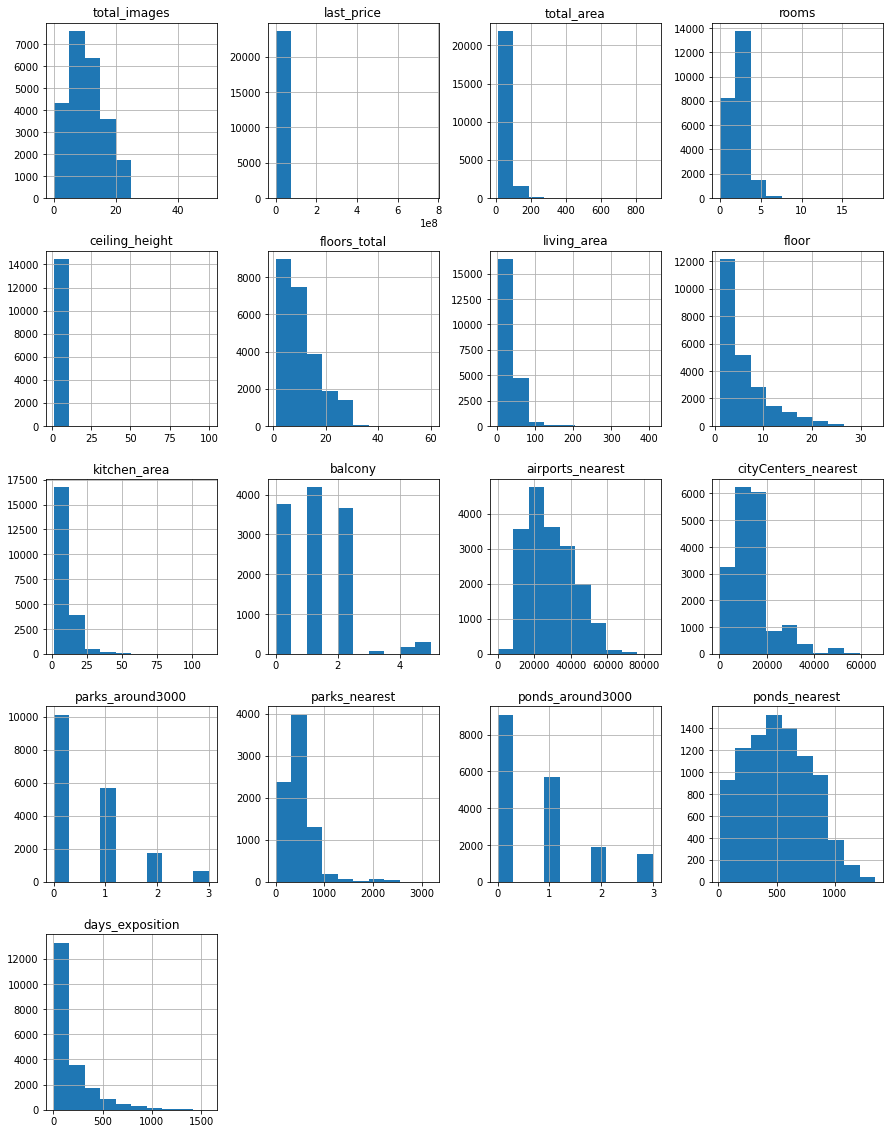

In [45]:
#построим гистограммы неотфильтрованных данных
%matplotlib inline
data.hist(figsize=(15, 20))

#### Найдем количество квартир

In [46]:
#найдем количество предложений на рынке
total_orders=data.shape[0] 
print(f'Количество предложений: {total_orders}')
total_apartment=data['is_apartment'].unique()
print(total_apartment)

Количество предложений: 23699
[nan False True]


In [47]:
#data.info
print(f'Набор данных состоит из строк и столбцов сответственно:{data.shape}')
print()
print('Тип данных в таблице следующий:') 
print(data.dtypes)
print(data.columns)

Набор данных состоит из строк и столбцов сответственно:(23699, 22)

Тип данных в таблице следующий:
total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 

#### **Видим 3 типа квартир:**
- open_plan — свободная планировка (булев тип),
- studio — квартира-студия (булев тип),
- is_apartment — апартаменты (должен быть булев, но есть пропуски - посчитаем их)

#### **Посчитаем количество пропусков** в 'is_apartment'.

Позже посмотрим - это ошибка или это просто отсутствие характеристик по тем или иным параметрам.

In [48]:
#print(data.dtypes.value_counts())
print()
#посчитаем количество пропусков в 'is_apartment'
print(data['is_apartment'].value_counts(dropna = False))


NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64


In [49]:
# переведем формат даты в привычную для нас форму
#data['first_day_exposition'] = pd.to_datetime(
#    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'

# Заменим тип данных на int, логически, чтобы не получилось два с половиной землекопа:
data['balcony'] = data['balcony'].astype('Int64')
#data['days_exposition'] = pd.array(data['days_exposition'], dtype=pd.Int64Dtype())
data['ponds_around3000'] = pd.array(data['ponds_around3000'], dtype=pd.Int64Dtype())
data['parks_around3000'] = pd.array(data['parks_around3000'], dtype=pd.Int64Dtype())

#Заменяем тип данных для дальнейших комфортных расчетов и построения графиков:
#airports_nearest,	cityCenters_nearest, parks_nearest,	ponds_nearest
data['airports_nearest'] = pd.array(data['airports_nearest'], dtype=pd.Int64Dtype())
data['cityCenters_nearest'] = pd.array(data['cityCenters_nearest'], dtype=pd.Int64Dtype())
data['parks_nearest'] = pd.array(data['parks_nearest'], dtype=pd.Int64Dtype())
data['ponds_nearest'] = pd.array(data['ponds_nearest'], dtype=pd.Int64Dtype())

display(data.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17182,14,"1,990,000.0",24.4,2017-01-23T00:00:00,0,NaN,16.0,17.2,9,NaN,...,NaN,2,поселок Бугры,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,159.0
21202,12,"5,295,000.0",73.4,2016-03-23T00:00:00,4,2.6,9.0,48.6,1,NaN,...,6.3,<NA>,Санкт-Петербург,34056,11621,1,393,1,1006,974.0
21677,0,"3,692,000.0",36.0,2017-11-10T00:00:00,1,NaN,12.0,22.4,8,NaN,...,6.9,0,Санкт-Петербург,9488,11553,0,<NA>,0,<NA>,4.0
3067,13,"6,600,000.0",95.0,2018-09-08T00:00:00,2,4.5,7.0,45.0,7,True,...,25.0,2,Выборг,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96.0
9348,13,"7,300,000.0",50.0,2017-09-07T00:00:00,2,3.2,6.0,31.0,5,NaN,...,7.0,<NA>,Санкт-Петербург,27314,6016,3,205,2,374,286.0


#### **Базово поработаем с пропущенными данными**
- Определим в количество пропущенных данных в процентном соотношении

In [50]:
#определим в количество пропущенных данных в процентном соотношении
import numpy as np
#for i in data.columns:
#    data_missing = np.mean(data[i].isnull())
#    print('{} - {}%'.format(i, round(data_missing*100)))
#print('{} - {}%'.format(i, round(data_missing*100)))
print('Все данные в процентном соотношении:')
print(round(data.isnull().mean()*100))

Все данные в процентном соотношении:
total_images            0.0
last_price              0.0
total_area              0.0
first_day_exposition    0.0
rooms                   0.0
ceiling_height         39.0
floors_total            0.0
living_area             8.0
floor                   0.0
is_apartment           88.0
studio                  0.0
open_plan               0.0
kitchen_area           10.0
balcony                49.0
locality_name           0.0
airports_nearest       23.0
cityCenters_nearest    23.0
parks_around3000       23.0
parks_nearest          66.0
ponds_around3000       23.0
ponds_nearest          62.0
days_exposition        13.0
dtype: float64


### **Предварительные выводы:**

Набор данных состоит из строк и столбцов сответственно: 23699, 22.
Посмотрела структуру данных, тип данных, перевеле некотрорые данные сразу в более удобный формат для работы.

По данным определили 3 типа квартир:
- open_plan — свободная планировка (булев тип),
- studio — квартира-студия (булев тип),
- is_apartment — апартаменты (должен быть булев, но есть пропуски - посчитаем их)

Проверили количество пропусков в процентном соотношении. Обнаружили пропуски в следующих данных:
ceiling_height - 39%, living_area - 8%, is_apartment - 88%, kitchen_area - 10%
balcony - 49%, airports_nearest - 23%, cityCenters_nearest - 23%, parks_around3000 - 23%, parks_nearest - 66%, ponds_around3000 - 23%, ponds_nearest - 62%, days_exposition - 13%

Определили, что необходимо проверить их причины -это ошибка, аномалия или это просто отсутствие характеристик по тем или иным параметрам.

Также выявились сразу странные данные: по высоте потолков в 100м - явная аномалия; 19-комнатная квартира (надо будет проверять - аномалия ли это или правда);
проверить на время размещения объявлений - более 4х лет есть данные.

Также явно видны неправильные типы данных (балконы, количество прудов и парков) - что-то заменила сразу. Столбец с датой также следует заменить в удобочитаемый формат. 

Явные дубли не обнаружены - проверим на неявные в следующем разделе.

### 2 **Предобработка данных**

#### Поработаем с **локацией - locality_name**, найдем неявные дубликаты. Обработаем данные для дальнейшего анализа

In [51]:
#data['locality_name'].duplicated().sum()
#понизим региср букв и заменим ё на е
data['locality_name']=data['locality_name'].str.lower().replace('ё', 'е', regex=True)
#data['locality_name_f'] = data['locality_name'].apply(count)
#data['locality_name'].sort_values().unique()

In [52]:
# проверим повторы в строках на примере поселка павлово
print(data['locality_name'].str.contains('павлово', na=False).sum())
print(data['locality_name'].str.contains('поселок павлово', na=False).sum())
#проверим количество уникальных значений в locality_name
#print(data['locality_name'].value_counts().tail(20))

18
9


In [53]:
#удалим обозначения населенных пунктов
# создаю список
replace_localicy=['коттеджный поселок', 'городской поселок', 'поселок городского типа','село', 'городской поселок', 'городской попоселок', 'садовое товарищество', 'садоводческое некоммерческое товарищество', 'деревня']
data.replace(regex=replace_localicy,value='поселок', inplace=True)
data['locality_name'] = data['locality_name'].str.replace('попоселокк', 'поселок')
# проверим опять повторы в строках на примере поселка павлово
print(data['locality_name'].str.contains('поселок павлово', na=False).sum())
data['locality_name'].sort_values().unique()


18


array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'зеленогорск', 'ивангород', 'каменногорск',
       'кингисепп', 'кириши', 'кировск', 'колпино', 'коммунар',
       'красное поселок', 'кронштадт', 'кудрово', 'лодейное поле',
       'ломоносов', 'луга', 'любань', 'мурино', 'никольское',
       'новая ладога', 'отрадное', 'павловск', 'петергоф', 'пикалево',
       'подпорожье', 'поселок агалатово', 'поселок александровская',
       'поселок алексеевка', 'поселок аннино', 'поселок аро',
       'поселок барышево', 'поселок батово', 'поселок бегуницы',
       'поселок белогорка', 'поселок белоостров', 'поселок большая вруда',
       'поселок большая ижора', 'поселок большая пустомержа',
       'поселок большие колпаны', 'поселок большое рейзино',
       'поселок большой сабск', 'поселок бор', 'поселок борисова грива',
       'поселок бугры', 'поселок будогощь', 'поселок ваганово',
       'поселок важины', 'поселок вартемяги', 'поселок вахнова к

Поссчитаем повторы в строках на примере поселка павлово: 18


<AxesSubplot:>

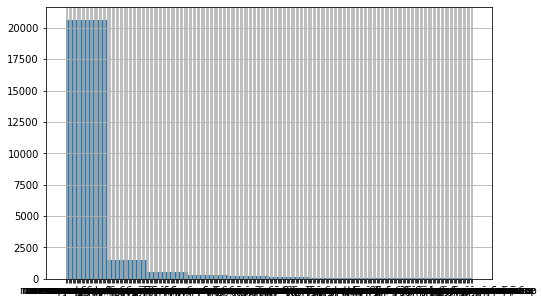

In [54]:
# проверим опять повторы в строках на примере поселка павлово
print('Поссчитаем повторы в строках на примере поселка павлово:', data['locality_name'].str.contains('поселок павлово', na=False).sum())
# построим гистограмму
data['locality_name'].hist(figsize=(8, 5))

In [55]:
#проверим статистику этого столбца
data['locality_name'].describe()

count               23650
unique                312
top       санкт-петербург
freq                15721
Name: locality_name, dtype: object

#### **Поработаем с пропусками**

In [56]:
#заменяем пропущенные значения
data['is_apartment'] = data['is_apartment'].fillna(False)
#проверяем
print(data['is_apartment'].value_counts(dropna = False))


False    23649
True        50
Name: is_apartment, dtype: int64


In [57]:
#проверим балконы
print(data['balcony'].value_counts(dropna = False))

NaN    11519
1       4195
0       3758
2       3659
5        304
4        183
3         81
Name: balcony, dtype: Int64


In [58]:
#заполним пропуски 0, так как, скорее всего они вызваны тем, что в квартирах нет балконов
data['balcony'] = data['balcony'].fillna(0)
#проверим балконы уще раз
print(data['balcony'].value_counts(dropna = False))

0      15277
1       4195
2       3659
5        304
4        183
3         81
NaN        0
Name: balcony, dtype: Int64


**Предварительные выводы:**
Заполнили пропуски 0, так как, скорее всего они вызваны тем, что в квартирах нет балконов

#### **Площадь кухни** 
Распределение тяготеющее к нормальному. Или распределение Пуассона. явных нет выбросов.
Даже из неотфтльтрованных данных видно, что в среднем размер кухни варьируется ОТ 5 м (что соответствует стандартам).

NaN     2278
6.0     1300
10.0    1262
8.0     1110
9.0     1101
        ... 
7.8        1
7.1        1
13.7       1
14.7       1
16.7       1
Name: kitchen_area, Length: 972, dtype: int64


count   21,421.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

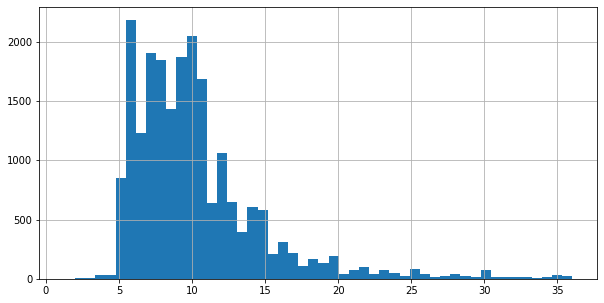

In [59]:
#Проверим kitchen_area. видим много пропущенных значений. Природу пропусков определить сложно. Быть может они относятся к студиям, проверим.
# Заполним их медианным значениями
print(data['kitchen_area'].value_counts(dropna = False))
#посмотрим гистограмму с ограничениями относительно квартилей и усов.
data['kitchen_area'].hist(bins=50, range=(1.3,36), figsize=(10, 5))
data['kitchen_area'].describe()


,open_plan,studio
kitchen_area_filt,,
0.0,2278,2278
6.0,1300,1300
10.0,1262,1262
8.0,1110,1110
9.0,1101,1101
...,...,...
93.2,1,1
100.0,1,1
100.7,1,1


,kitchen_area_filt
rooms,
12,112.0
15,100.0
19,27.6
8,23.1
14,21.2
10,19.8
6,18.7
7,18.0
5,14.4


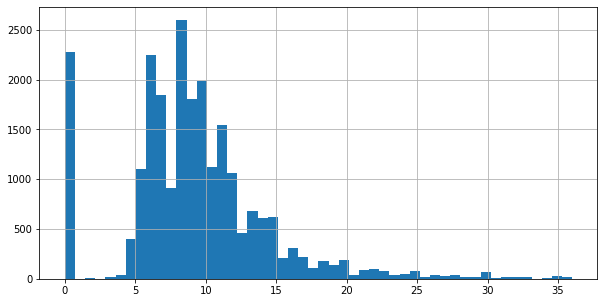

In [60]:
data['kitchen_area_filt'] = data['kitchen_area'].fillna(0)
data['kitchen_area_filt'].hist(bins=50, range=(0,36), figsize=(10, 5))
data['kitchen_area_filt'].describe()
#display(data.head())
#поверим наличие пропусков в случае квартиры-студии. Возможно они связвны именно с планировкой.
data_1 = data.pivot_table(index='kitchen_area_filt', values=['studio','open_plan'], aggfunc='count')
display(data_1.sort_values(['studio','open_plan'], ascending=[False,False]))
data_2 = data.pivot_table(index='rooms', values='kitchen_area_filt', aggfunc='median')
display(data_2.sort_values('kitchen_area_filt', ascending=False))
#print(data.query('kitchen_area_filt==0'))

При замене на 0 - появляется явный выброс. Неверно пропущенные значения в кухнях заменять на 0, это показывает в том числе ухудшение показателя среднестатистического отклонения.
Следовательно -  гипотиза неверная, заменяем на 5 (согласно строительным стандартам РФ). 

Отфильтровала и заменила данные, показатели стали более чистыми - медианный показатель и средний практически сравнялись.


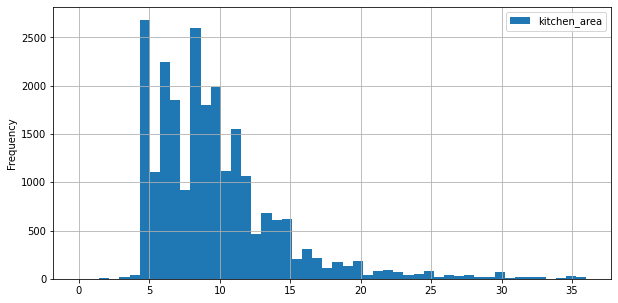

In [61]:
data['kitchen_area'] = data['kitchen_area'].fillna(5)
#data['kitchen_area'].hist(bins=50, range=(0,36), figsize=(10, 5))
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,36))
data['kitchen_area'].describe()
print('Отфильтровала и заменила данные, показатели стали более чистыми - медианный показатель и средний практически сравнялись.')

#### **Предварительные выводы:** 
- Заполнили пропуски в балконах 0, так как, скорее всего они вызваны тем, что в квартирах нет балконов
- поверила наличие пропусков в кухнях в случае квартиры-студии. Возможно они связвны именно с планировкой.
> предположение о планировке оказалось верным - отсутствие значений пракстически полностью соответствует планировке либо квартиры-студии, либо открытой планировке. 
- По количеству комнат также видно, что отсутствие значений кухни соответствует отсутствиюю комнат.
- Проверила гипотезу замены пропущенных значений на 0 - появился явный выброс. Неверно пропущенные значения в кухнях заменять на 0, это показывает в том числе ухудшение показателя среднестатистического отклонения. Следовательно -  гипотиза неверная, заменила на 5 м (согласно строительным стандартам РФ).

#### **Высота Потолков - ceiling_height**

Проверим пропуски и заполним их значениями. 
Для начала - посмотрим статистику стандартов высоты потолков в строительстве.


In [87]:
print(data.query('ceiling_height > 20')['ceiling_height'].value_counts())
data['ceiling_height'] = data.query('ceiling_height > 20')['ceiling_height']/10

data['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
24.0     1
27.5     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64


2.7     8
2.5     7
3.2     2
2.6     1
2.3     1
2.8     1
10.0    1
2.4     1
Name: ceiling_height, dtype: int64

In [88]:
data['ceiling_height'].describe()

count   22.0
mean     3.0
std      1.6
min      2.3
25%      2.5
50%      2.7
75%      2.7
max     10.0
Name: ceiling_height, dtype: float64

Растрпеделение гистограммы высоты потолков после обработки - стало однородным


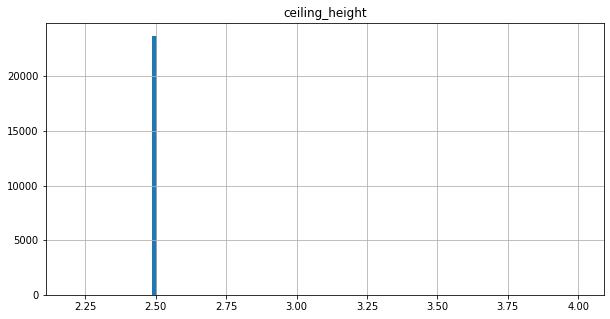

In [89]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)
data.hist('ceiling_height', range=(2.2, 4), bins=100, figsize=(10, 5))
data['ceiling_height'].describe()
print('Растрпеделение гистограммы высоты потолков после обработки - стало однородным')

#### **Предварительные выводы:**

В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м. 
Этот стандарт установила в пропусках высоты потолков.

#### **Жилая площадь - living_area**



NaN      1903
18.0      882
17.0      675
30.0      598
16.0      486
         ... 
32.0        1
103.1       1
123.9       1
32.4        1
16.7        1
Name: living_area, Length: 1783, dtype: int64


count   21,796.0
mean        34.5
std         22.0
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64

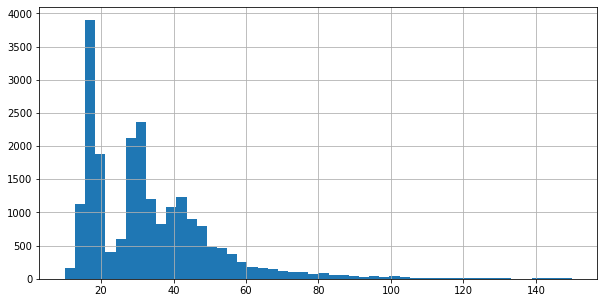

In [90]:
print(data['living_area'].value_counts(dropna = False))
data['living_area'].hist(bins=50, range=(10,150), figsize=(10, 5))
data['living_area'].describe()

#данные меньше 16 м можно отбросить - не существенные.
#print(data.query('0 < living_area <= 10')['living_area'].value_counts())

<AxesSubplot:title={'center':'Жилая площадь - living_area'}, xlabel='living_area'>

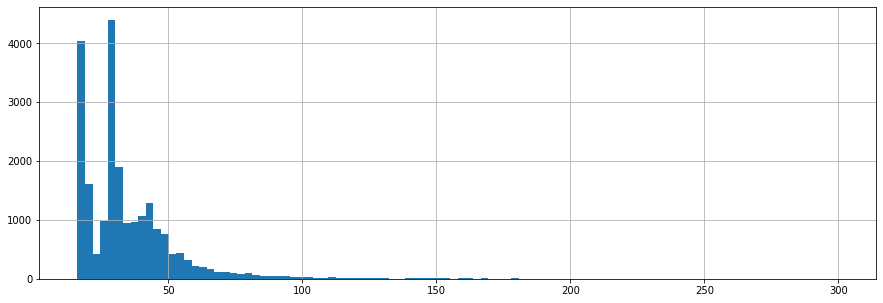

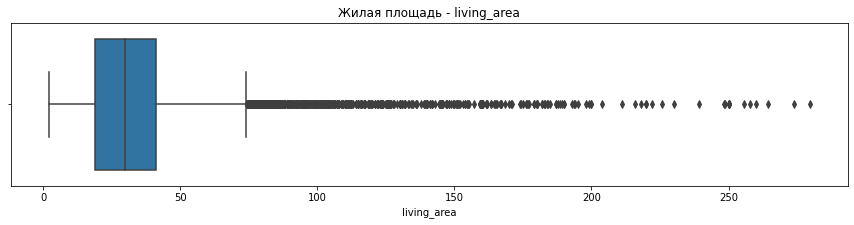

In [91]:
data['living_area'] = data['living_area'].fillna(30)
#построим усы и гистограмму
data['living_area'].hist(bins=100, range=(16,300), figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Жилая площадь - living_area")
sns.boxplot(x='living_area', data=data[data['living_area']<300])
#data.boxplot('living_area', figsize=(10, 8))

#### **Предварительные выводы:**

Пропуски заменила медианным значением в 30м. Пропусков много - удалять не стоит.
Наблюдаются яркий выброс при значениях менее 20м. Посмотрим позже - аномальный или закономерный.Большое значение - очень странный пик и большое отклонение. Можно было бы проверить на соответсвие комнат при более глубоком исследовании. Но это не наша задача. В целом - распределение нормальное.

Также для большей достоверности данных отфильтровала их, допустив минималное значение жилой площади в 16м согласно Российским стандартам. Все значения ниже будем считать аномальными.

#### Разберемся теперь с **ближайшими Аэропортами - airports_nearest** - 23%

NaN      5542
37434      61
21928      32
44870      30
39946      30
         ... 
23488       1
43982       1
26003       1
21457       1
40015       1
Name: airports_nearest, Length: 8276, dtype: Int64


count   18,157.0
mean    28,793.7
std     12,630.9
min          0.0
25%     18,585.0
50%     26,726.0
75%     37,273.0
max     84,869.0
Name: airports_nearest, dtype: float64

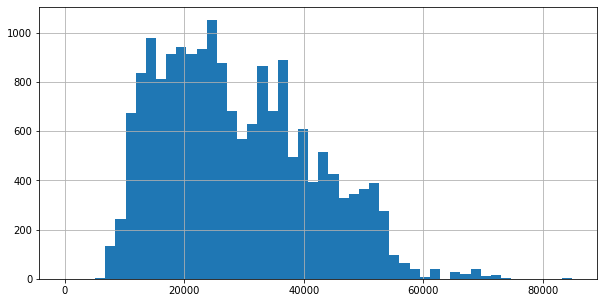

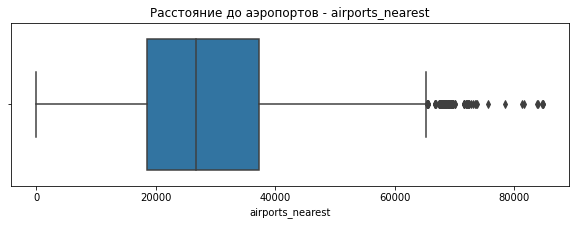

In [92]:
print(data['airports_nearest'].value_counts(dropna = False))
data['airports_nearest'].hist(bins=50, figsize=(10, 5))
plt.subplots(figsize=(10, 3))
plt.title("Расстояние до аэропортов - airports_nearest")
sns.boxplot(x='airports_nearest', data=data)
data['airports_nearest'].describe()

#### **Предварительные выводы:**

Считаю, что заменять пропущенные значения в расстоянии до аэропортов не имеет смысла, скорее всего - аэропорты очень далеко от данных населенных пунктов
Аналогичная ситуация с Парками и прудами. Пока оставляю как есть.

#### Посмотрим время **размещения - days_exposition**:
сколько дней было размещено объявление

count   20,518.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64

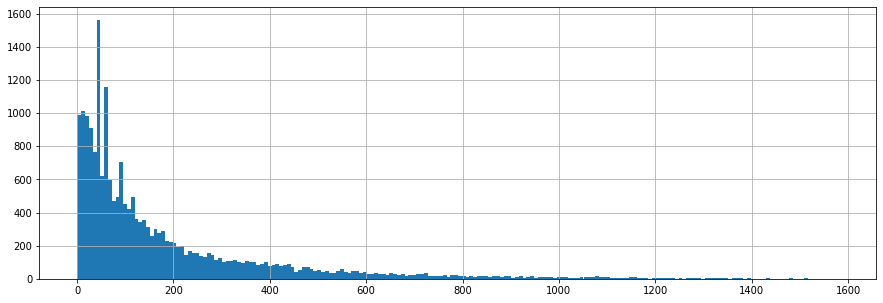

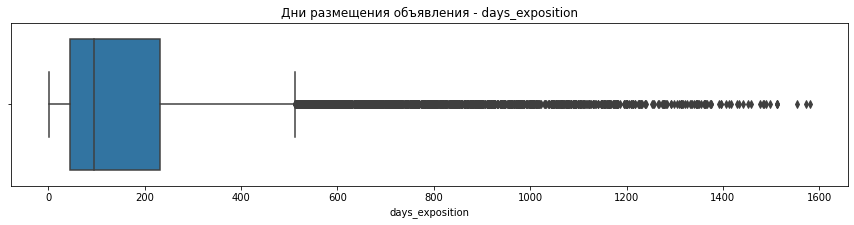

In [93]:
#print(data['days_exposition'].value_counts(dropna = False))
data['days_exposition'].hist(bins=200, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Дни размещения объявления - days_exposition")
sns.boxplot(x='days_exposition', data=data)
data['days_exposition'].describe()

In [94]:
#Проверим в каких именно значениях наблюдаются большие пики на гистограмме
data[data['days_exposition']!=0]['days_exposition'].value_counts()

#заменяем пропущенные значения медианным из отчищенных данных - в среднем получается 90 дней (3 месяца)
#data['days_exposition'] = data['days_exposition'].fillna(90)
#print(data['days_exposition'].value_counts(dropna = False))
#data['days_exposition'].hist(bins=100, figsize=(15, 5))
#plt.subplots(figsize=(15, 3))
#plt.title("Дни размещения объявления - days_exposition")
#sns.boxplot(x='days_exposition', data=data)
#print('Появившийся яркий пик вызван заменой пропущенных значений. В остальном распределение нормальное.')
#data['days_exposition'].describe()

45.0       880
60.0       538
7.0        234
30.0       208
90.0       204
          ... 
969.0        1
1.0          1
1,147.0      1
1,148.0      1
1,174.0      1
Name: days_exposition, Length: 1141, dtype: int64

#### **Предварительные выводы:**

В целом распределение нормальное:
min время размещения 1 день (быть может и правда так быстро продажа была, если по догворенности), в среднем - 95 дней, максимальное время - 1,580 дней (4 года, вероятно это данные по той странной 19комнатной квартире), все данные будем проверять.

> Но наблюдаются яркие пики на гистограмме: примерно на 7, 30, 45, 60 и 90 днях - очень большие, может быть и аномалии. Проверим их чуть позже при более детальном анализе. Чем могут быть вызваны - насколько систематичны. 

Данные в данном столбце оставим пока без изменений. Требуется проверка

#### Проверим данные **parks_around3000** и **ponds_around3000**

In [95]:
#проверим парки (у прудов аналогичная ситуация)
print(data['parks_around3000'].value_counts(dropna = False))
#Как видим большинство из предложений недвиджимости находятся очень далеко от них. И рядом парков и прудов просто нет.
#display(data[data['parks_around3000'].isna()].groupby('locality_name')['last_price'].count().sample(7))

0      10106
1       5681
NaN     5518
2       1747
3        647
Name: parks_around3000, dtype: Int64


0      15624
1       5681
2       1747
3        647
NaN        0
Name: parks_around3000, dtype: Int64
После заполнения пропусков - аномальные выбросы ушли.
Причем показатели очень близкие - что подтверждает гипотезу о том,
что отсутствие прудов и парков говорит об удаленности от центра


count   23,699.0
mean         0.5
std          0.7
min          0.0
25%          0.0
50%          0.0
75%          1.0
max          3.0
Name: parks_around3000, dtype: float64

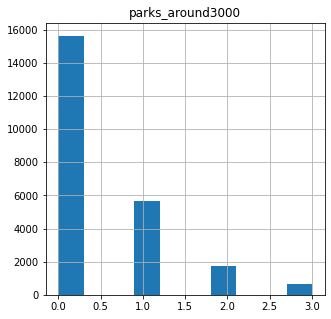

In [96]:
#заполним пропуски 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#проверяем
print(data['parks_around3000'].value_counts(dropna = False))
print('После заполнения пропусков - аномальные выбросы ушли.')
print('Причем показатели очень близкие - что подтверждает гипотезу о том,')
print('что отсутствие прудов и парков говорит об удаленности от центра')
data.hist('parks_around3000', figsize=(5,5))
data['parks_around3000'].describe()
#data.hist('ponds_around3000', figsize=(5,5))

In [97]:
#явная связь между удаленностью от центра СПБ и от парков, прудов, аэропорта 
display(data[data['cityCenters_nearest'].isna()].sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_filt,adjusted_ceiling_height
1201,12,"5,000,000.0",52.0,2018-01-12T00:00:00,2,2.5,14.0,30.0,13,False,...,поселок кудрово,<NA>,<NA>,0,<NA>,0,<NA>,60.0,0.0,NaN
12329,7,"800,000.0",51.1,2016-05-31T00:00:00,2,2.5,2.0,24.7,1,False,...,пикалево,<NA>,<NA>,0,<NA>,0,<NA>,45.0,8.0,NaN
7386,8,"2,950,000.0",42.0,2017-12-16T00:00:00,1,2.5,15.0,30.0,9,False,...,выборг,<NA>,<NA>,0,<NA>,0,<NA>,32.0,0.0,NaN
14039,9,"3,100,000.0",33.3,2016-04-21T00:00:00,1,2.5,10.0,16.0,8,False,...,поселок тельмана,<NA>,<NA>,0,<NA>,0,<NA>,156.0,9.0,NaN
7586,6,"2,820,000.0",45.6,2017-10-11T00:00:00,1,2.5,9.0,19.0,6,False,...,поселок старая,<NA>,<NA>,0,<NA>,0,<NA>,104.0,10.8,NaN


#### **Предварительные выводы:**

Проверила парки (у прудов аналогичная ситуация). Определила, что большинство из предложений недвиджимости находятся очень далеко от них. Это значит, что рядом парков и прудов просто нет. Поэтому пропуски заменила на 0.

После заполнения пропусков - аномальные выбросы ушли.
Данные по прудам и пракам очень близкие - что подтверждает гипотезу о том,
что отсутствие прудов и парков говорит об удаленности от центра.

Также по отсутствующим значениям прослеживается явная связь между удаленностью от центра СПБ и от парков, прудов, аэропорта.

### **3.1 Исследовательский анализ. Посчитаем и добавим в таблицу новые столбцы**
-  цена одного квадратного метра
-  день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
-  месяц публикации объявления
-  год публикации объявления
-  тип этажа квартиры (значения — «первый», «последний», «другой»)
-  расстояние в км до центра города

In [98]:
import warnings

warnings.filterwarnings("ignore")
# рассчитаем цену одного квадратного метра и создадим столбец price_1sm
data['price_1sm'] = data['last_price'] / data['total_area']
#выведем среднюю стоимость по населенным пунктам
data_average=data.pivot_table(index='locality_name',  values='price_1sm', aggfunc='median')
# Проверяем
display(data_average.sort_values('price_1sm').tail(5))
#data_average.describe()

,price_1sm
locality_name,
сестрорецк,"99,678.5"
кудрово,"100,000.0"
пушкин,"100,000.0"
зеленогорск,"101,666.7"
санкт-петербург,"104,761.9"


In [99]:
# переведем формат даты в привычную для нас форму
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [100]:
import warnings

warnings.filterwarnings("ignore")

#добавим столбец c днем недели публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['weekday']=data['first_day_exposition'].dt.weekday
print(data['weekday'].sample(5))

#добавим столбец месяца публикации объявления
data['month'] = data['first_day_exposition'].dt.month
#добавим столбец года
data['year'] = data['first_day_exposition'].dt.year
#проверим
display(data.sample(5))


19353    4
13259    5
21359    1
11723    3
1469     5
Name: weekday, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_filt,adjusted_ceiling_height,price_1sm,weekday,month,year
14495,8,"4,480,000.0",44.4,2018-10-22,2,2.5,5.0,30.0,3,False,...,<NA>,0,<NA>,58.0,6.5,2.5,"100,900.9",0,10,2018
3669,6,"6,450,000.0",71.1,2016-10-06,3,2.5,12.0,48.1,7,False,...,355,1,526,259.0,8.8,2.7,"90,717.3",3,10,2016
9371,2,"3,700,000.0",61.0,2017-01-02,2,2.5,25.0,38.8,5,False,...,<NA>,1,582,241.0,9.2,2.6,"60,655.7",0,1,2017
19013,20,"11,000,000.0",68.5,2017-09-19,2,2.5,13.0,33.4,5,False,...,875,2,24,188.0,12.6,3.1,"160,583.9",1,9,2017
19835,4,"1,950,000.0",32.0,2016-05-26,1,2.5,5.0,18.0,2,False,...,<NA>,0,<NA>,98.0,6.0,NaN,"60,937.5",3,5,2016


In [101]:
#проверим частоту этажности
print(data['floors_total'].value_counts(dropna = False))

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
33.0       1
29.0       1
60.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64


In [102]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
#сгруппируем данные
data['floor'] = data['floor'].astype('int64')
def floors_category (row): #(floor, floors_total):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
#print(floor_category (3, 3))
#Применим метод apply
data['floors_category'] = data.apply(floors_category, axis = 1)

#проверим
display(data.tail(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_filt,adjusted_ceiling_height,price_1sm,weekday,month,year,floors_category
23694,9,"9,700,000.0",133.8,2017-03-21,3,2.5,5.0,73.3,3,False,...,3,381,NaN,13.8,3.7,"72,490.8",1,3,2017,другой
23695,14,"3,100,000.0",59.0,2018-01-15,3,2.5,5.0,38.0,4,False,...,0,<NA>,45.0,8.5,NaN,"52,542.4",0,1,2018,другой
23696,18,"2,500,000.0",56.7,2018-02-11,2,2.5,3.0,29.7,1,False,...,0,<NA>,NaN,0.0,NaN,"44,091.7",6,2,2018,первый
23697,13,"11,475,000.0",76.8,2017-03-28,2,2.5,17.0,30.0,12,False,...,3,196,602.0,23.3,3.0,"149,511.4",1,3,2017,другой
23698,4,"1,350,000.0",32.3,2017-07-21,1,2.5,5.0,12.3,1,False,...,0,<NA>,NaN,9.0,2.5,"41,795.7",4,7,2017,первый


In [103]:
# Рассчитаем расстояние в км до центра города
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000
display(data.sample(3))
data['cityCenters_nearest_km'].describe()
#data['cityCenters_nearest_km'].hist()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,kitchen_area_filt,adjusted_ceiling_height,price_1sm,weekday,month,year,floors_category,cityCenters_nearest_km
2357,3,"6,615,000.0",57.8,2018-06-26,2,2.5,18.0,35.1,17,False,...,594,58.0,9.7,NaN,"114,486.0",1,6,2018,другой,16.6
9665,6,"2,600,000.0",31.3,2017-04-20,1,2.5,4.0,18.2,2,False,...,<NA>,15.0,5.6,NaN,"83,067.1",3,4,2017,другой,17.5
7721,9,"7,200,000.0",135.0,2016-04-08,2,2.5,4.0,99.5,1,False,...,<NA>,400.0,14.4,3.0,"53,333.3",4,4,2016,первый,35.4


count   18,180.0
mean        14.2
std          8.6
min          0.2
25%          9.2
50%         13.1
75%         16.3
max         66.0
Name: cityCenters_nearest_km, dtype: float64

#### **Предварительные выводы:**
Поссчитала и добавила в столбцы со следующими значениями:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

### 3.2 **Исследовательский анализ данных**
- изучим и описем следующие параметры:
  - общая площадь;
  - жилая площадь (описано выше);
  - площадь кухни (описано выше);
  - цена объекта;
  - количество комнат;
  - высота потолков (описаны выше);
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
-  построим гистограммы для каждого параметра

count   23,699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0
Name: total_area, dtype: float64

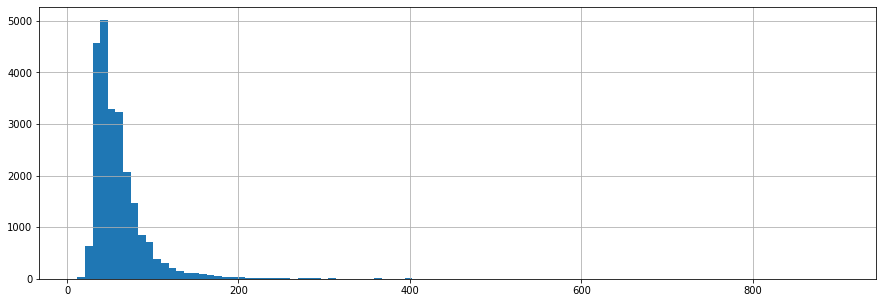

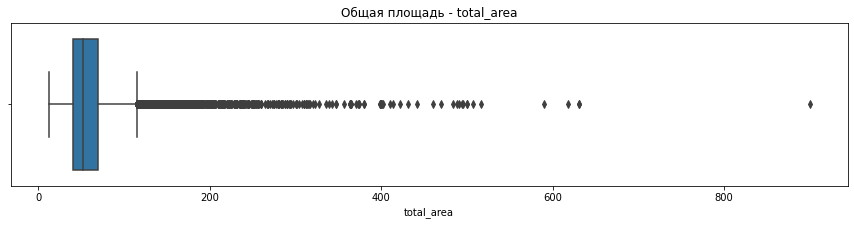

In [104]:
# общая площадь
#good_la = data.query('16 <= living_area <= 80')
#построим усы и гистограмму
data['total_area'].hist(bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Общая площадь - total_area")
sns.boxplot(x='total_area', data=data)
data['total_area'].describe()

Средний показатель общей площади квартир составляет - 50.0 кв.м.


count   22,063.0
mean        53.5
std         18.1
min         19.0
25%         39.1
50%         50.0
75%         64.7
max        105.0
Name: total_area, dtype: float64

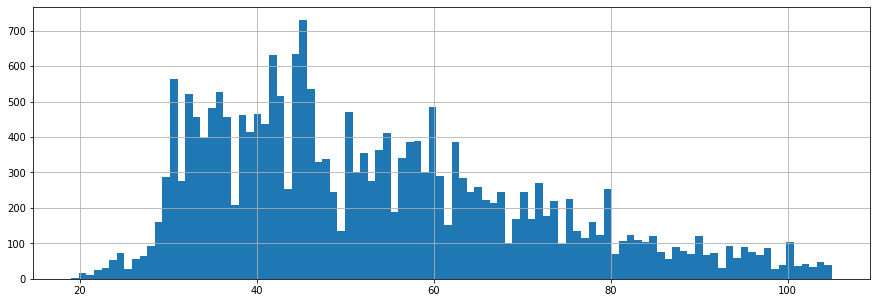

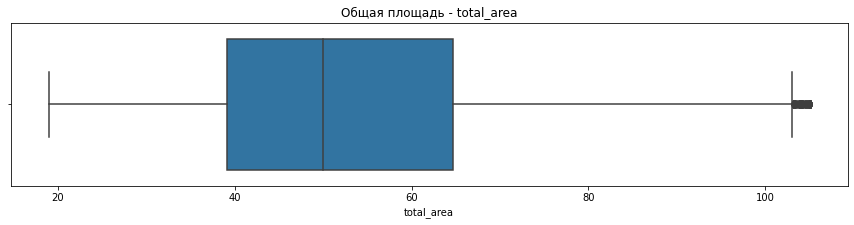

In [105]:
#Улучшим данные - отсечем данные за усами. 
#По стандартам минимальная площадь квартиры должна быть на менее 19 кв.м.= жилая + кухня.
#Поставим минимальную границу - 19 кв.м., верхнию рассчитываем по верхней границе усов графика 
good_ta = data.query('19 <= total_area <= 105')
print(f'Средний показатель общей площади квартир составляет - {good_ta["total_area"].median()} кв.м.')
good_ta['total_area'].hist(bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Общая площадь - total_area")
sns.boxplot(x='total_area', data=good_ta)
good_ta['total_area'].describe()

count   21,475.0
mean        32.8
std         13.3
min         16.0
25%         20.6
50%         30.0
75%         41.0
max         80.0
Name: living_area, dtype: float64

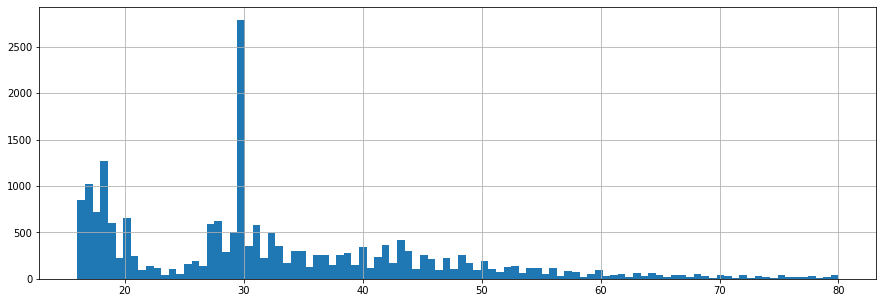

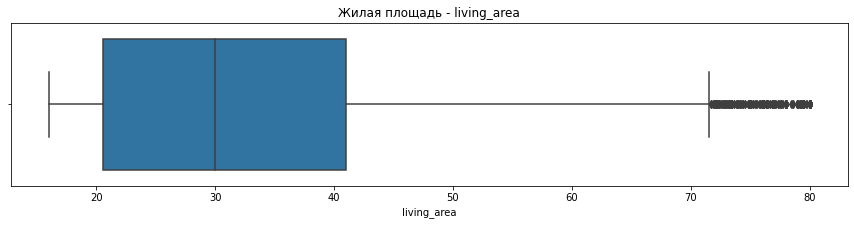

In [106]:
#жилая площадь
#отфильтруем по минимальному занчению 16 кв.м. и 80 кв.м. по максимуму (опираясь на усы, с некоторым допущением в +)
good_la = data.query('16 <= living_area <= 80')
#построим усы и гистограмму
good_la['living_area'].hist(bins=100, range=(16,80), figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Жилая площадь - living_area")
sns.boxplot(x='living_area', data=good_la[good_la['living_area']<300])
good_la['living_area'].describe()

In [107]:
print(f'Средний показатель жилой площади квартир составляет - {data["living_area"].median()} кв.м.,')
print('что соответствует реальным показателям и коррелирует с oбщей площадью квартир.')
print('Коэффициент корреляции Пирсона -', data['living_area'].corr(good_ta['total_area']))
data['living_area'].describe()

Средний показатель жилой площади квартир составляет - 30.0 кв.м.,
что соответствует реальным показателям и коррелирует с oбщей площадью квартир.
Коэффициент корреляции Пирсона - 0.864691896068745


count   23,699.0
mean        34.1
std         21.2
min          2.0
25%         19.0
50%         30.0
75%         41.1
max        409.7
Name: living_area, dtype: float64

count   23,699.0
mean         6.5
std         10.9
min          0.0
25%          3.4
50%          4.7
75%          6.8
max        763.0
Name: last_price_mln, dtype: float64

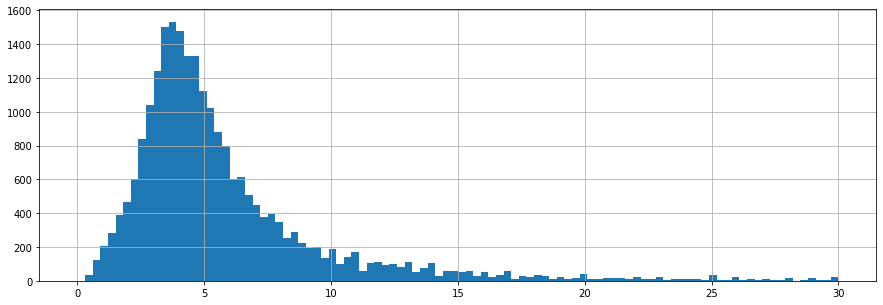

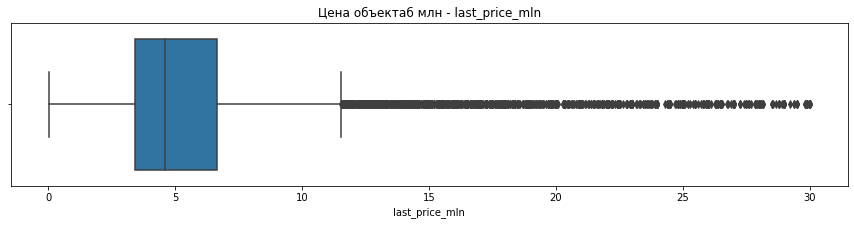

In [108]:
#Цена объекта
#Переведем данные в млн.руб, для более легкого восприятия информации
data['last_price_mln'] = data['last_price']/1000000
data['last_price_mln'].hist(bins=100, range = (0,30), figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Цена объектаб млн - last_price_mln")
sns.boxplot(x='last_price_mln', data=data[data['last_price_mln']<30])
data['last_price_mln'].describe()

Данные стали значительно чище - среднестатистическое отклонение стало меньше 3,
Средняя стоимость стала близка к медиане: 5.1 млн и 4.5 млн соответственно.


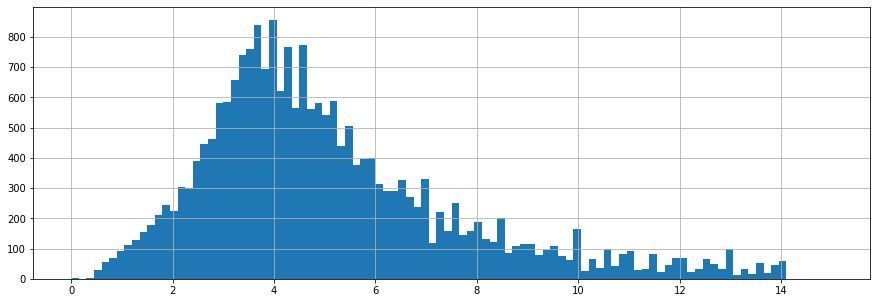

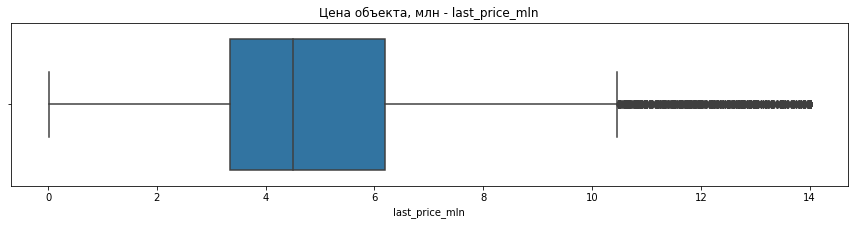

In [109]:
# Гистограмма выглядит нормальным распределением, улучшим чуть данные:
# Обрежем их по усам, возьмем 14 млн за максимум
good_price = data.query('last_price_mln <= 14')
good_price['last_price_mln'].hist(bins=100, range = (0,15), figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Цена объекта, млн - last_price_mln")
sns.boxplot(x='last_price_mln', data=good_price[good_price['last_price_mln']<15])
good_price['last_price_mln'].describe()
print(f'Данные стали значительно чище - среднестатистическое отклонение стало меньше 3,')
print(f'Средняя стоимость стала близка к медиане: {format(good_price["last_price_mln"].mean(),".1f")} млн\
 и {good_price["last_price_mln"].median()} млн соответственно.')

In [110]:
#Высота потолков
print(f'Средняя высота потолка - {format(data["ceiling_height"].mean(),".1f")}, соответствует российским стандартам,')
print('есть небольшие выбросы но они не особо влияют на среднее значение')
data['ceiling_height'].describe()

Средняя высота потолка - 2.5, соответствует российским стандартам,
есть небольшие выбросы но они не особо влияют на среднее значение


count   23,699.0
mean         2.5
std          0.0
min          2.3
25%          2.5
50%          2.5
75%          2.5
max         10.0
Name: ceiling_height, dtype: float64

count   6,709.0
mean        9.1
std         3.4
min         1.3
25%         6.6
50%         9.0
75%        10.7
max        50.0
Name: kitchen_area, dtype: float64

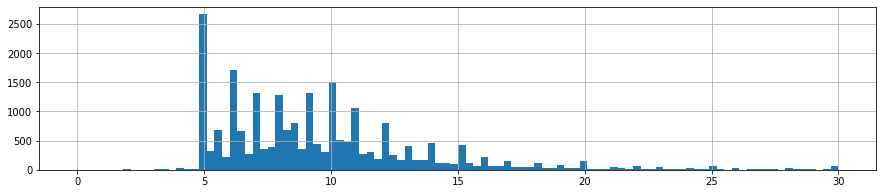

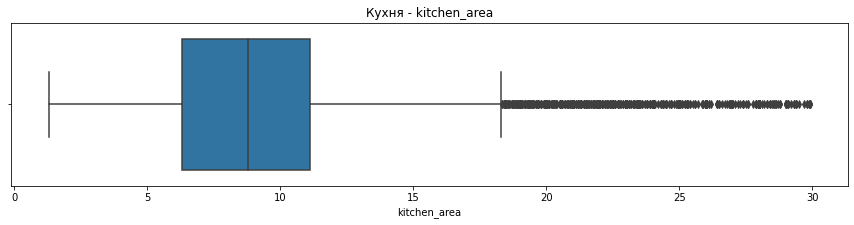

In [111]:
data['kitchen_area'].hist(bins=100, range = (0,30), figsize=(15, 3))
plt.subplots(figsize=(15, 3))
plt.title("Кухня - kitchen_area")
sns.boxplot(x='kitchen_area', data=data[data['kitchen_area']<30])
#Отфильтруем данные по усам с максимумом чуть в +
good_ka = data.query('5 <= living_area <= 20')
data['kitchen_area'].describe()
good_ka['kitchen_area'].describe()

#### **Предварительные выводы:**

-  Выявлено несколько аномальных значений, в основном по максимальным и минимальным значениям **общей и жилой площади**. Все значения отсекла в соответствии с усами графика. 
В целом, распределение нормальное.
> В жилой площади при обработке данных появился яркий пик при 30.0 кв.м., но этой величиной было бы наиболее логично заменить пропущенные значения.
При предваорительном расчете средний показатель **жилой площади** квартир составляет - **30.0 кв.м.**, им и заменили пропущенные значения.
что соответствует реальным показателям и коррелирует с **oбщей площадью квартир**. Коэффициент корреляции Пирсона - 0.87.

-  В итоге средний показатель **общей площади** квартир составляет - **50.0 кв.м.** Минимальным показателем поставила 19.0 - квартира студия, согласно стандартам РФ. Самая большая квартира - 105.0 кв.м.
-  **Средняя высота потолка** - **2.6**, соответствует российским стандартам,
есть небольшие выбросы но они не особо влияют на среднее значение
- Ранее заменила пропущенные значения на 5 м (согласно строительным стандартам РФ, где минимальная площадь кухни должна быть 5 м.). Затем отфильтровала данные от 5м до максимального значения по усам чуть в плюс. 
> В итоге видим, распределение нормальное: в **среднем площадь кухни - 9 кв.м.**, и данные не очень отличаются от медианного значения в 9.1 кв.м. Среднее отклонение значительно снизилось до показателя в 3.4.

- **Цену объекта** перевели в разряд млн, для более легкого восприятия информации.Гистограмма выглядит нормальным распределением, улучшили чуть данные:
Обрезала по усам - взяла 14 млн за максимум. 
> В итоге данные стали значительно чище - среднестатистическое отклонение стало меньше 3. **Средняя стоимость стала близка к медиане: 5.1 млн и 4.5 млн** соответственно.


### **3.3 Исследовательский анализ (продолжение - floors)**
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  -  Количество комнат

In [112]:
#тип этажа квартиры («первый», «последний», «другой»);
#data.plot(y='floors_category', kind='pie', figsize = (5,5))
display(data.pivot_table(index='floors_category', values= ['floor','floors_total'], aggfunc='count'))

,floor,floors_total
floors_category,,
другой,17446,17363
первый,2917,2914
последний,3336,3336


Большинство квартир, выставленных на продажу расположены на 2 этаже.
В принципе большинство квартир - это 1-9 этаж. Что коррелирует с данными наиболее часто встречающихся многоэтажек 5- и 9-этажек
Много продается квартир из многоэтажек


,floors_category,floor,floors_total
0,другой,2,3175
1,другой,3,2836
2,другой,4,2464
3,другой,5,1342
4,другой,6,1147
5,другой,7,1125
6,другой,8,1031
7,другой,9,652
8,другой,10,566
9,другой,11,507


2    3368
3    3073
1    2917
4    2804
5    2621
Name: floor, dtype: int64
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64


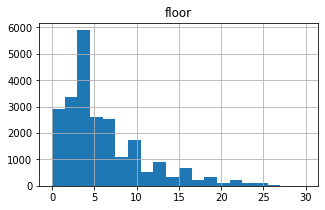

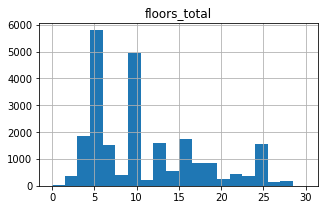

In [113]:
#Этаж квартиры
data.hist('floor', bins=20, grid=True, range=(0,30), figsize = (5,3))
data['floor'].describe()
#общее количество этажей в доме;
data.hist('floors_total', bins=20, grid=True, range=(0,30), figsize = (5,3))
data['floors_total'].describe()
print('Большинство квартир, выставленных на продажу расположены на 2 этаже.')
print('В принципе большинство квартир - это 1-9 этаж. Что коррелирует с данными наиболее часто встречающихся многоэтажек 5- и 9-этажек')
print('Много продается квартир из многоэтажек')
checkеd_floors = data.pivot_table(index=['floors_category','floor'], values= 'floors_total', aggfunc='count')
#уберем мультииндекс
checkеd_floors = checkеd_floors.reset_index()
display(checkеd_floors)

print(data['floor'].value_counts().head())
print(data['floors_total'].value_counts().head())

Данные похожи на реальные: большинство квартир, выставленных на продажу - от 1 до 4 х комнат. Больше всего продается 1 комнатных квартир.
Есть 1 квартира в 19 комнат, что может быть реальностью, проверим по цене и общей площади, не аномальное ли значение 


,rooms,last_price_mln,total_area
0,0,2.5,27.0
1,1,3.4,40.4
2,2,5.2,56.0
3,3,13.0,108.0
4,4,4.0,60.0
5,5,15.5,149.0
6,6,11.8,136.0
7,7,65.0,365.0
8,8,16.5,229.0
9,9,50.0,398.0


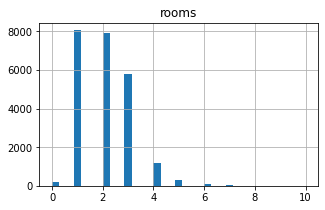

In [114]:
#Количество комнат
data.hist('rooms', bins=35, grid=True, range=(0,10), figsize = (5,3))
data['rooms'].describe()
print('Данные похожи на реальные: большинство квартир, выставленных на продажу - от 1 до 4 х комнат. Больше всего продается 1 комнатных квартир.')
print('Есть 1 квартира в 19 комнат, что может быть реальностью, проверим по цене и общей площади, не аномальное ли значение ')
#data = data[data['total_area'] != 0.3]
#data.loc[~data['rooms'].isin([0.3])]
#отсечем аномальное значение 0.3 комнаты
data = data.query('total_area > 0.3')
checkеd_rooms = data.pivot_table(index='rooms', values= ['total_area','last_price_mln'], aggfunc='first')
#уберем мультииндекс
checkеd_rooms = checkеd_rooms.reset_index()
display(checkеd_rooms)
# также проверим странную величину 0.3 - комнаты - по результату видно, что это аномальное значение отсечем его

#### **Предварительные выводы:**
-  Данные количеству комнат похожи на реальные: большинство квартир, выставленных на продажу - от 1 до 4 х комнат. Больше всего продается 1 комнатных квартир.
> Есть 1 квартира в 19 комнат, что может быть реальностью, проверим по цене и общей площади, не аномальное ли значение, просто редкое.

 > А вот к аномальным значениям я бы отнесла количество комнат- 0.3, это странно и по другим показателям тоже смотрится аномалией. Удаляем его через общую площадь, чтобы не потерять данные об нулевом количестве комнат, так как последнее возможно- квартира-студия.

-  Большинство квартир, выставленных на продажу расположены на 2 этаже.
В принципе большинство продающихся квартир находятся на 1-9 этажах. 
Что коррелирует с данными наиболее часто встречающихся многоэтажек 5- и 9-этажек. 

  В принципе очень много продается квартир из многоэтажек
- Высота полтолков средняя 2,5 м, согласно стандартам РФ.

### **3.4 Исследовательский анализ (продолжение - расстояния)**
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;


count   18,180.0
mean        14.2
std          8.6
min          0.2
25%          9.2
50%         13.1
75%         16.3
max         66.0
Name: cityCenters_nearest_km, dtype: float64

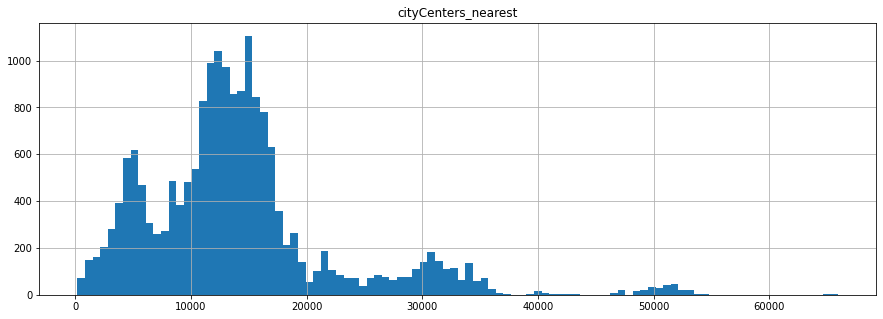

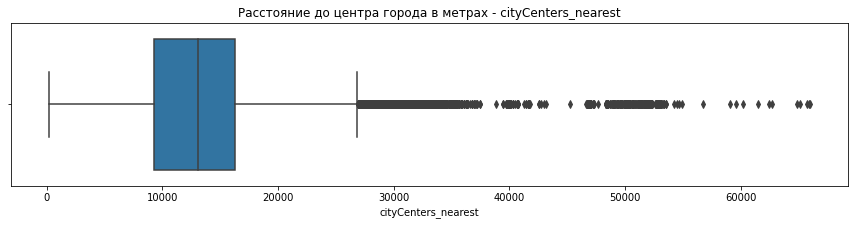

In [115]:
#Расстояние до центра города в метрах;
#data['cityCenters_nearest'].hist()
data.hist('cityCenters_nearest', bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Расстояние до центра города в метрах - cityCenters_nearest")
sns.boxplot(x='cityCenters_nearest', data=data) 
data['cityCenters_nearest_km'].describe()

In [116]:
#проверим - есть ли аномалии в расстояниях до центра
#используем данные в км - их удобнее читать
data_сс=data[(data['cityCenters_nearest_km']< 60)&(data['cityCenters_nearest_km']> 45)]
display(data_сс.pivot_table(index=['locality_name','parks_around3000'], values ='cityCenters_nearest_km', aggfunc='min'))
print('Аномалий в расстояниях до центра нет - все данные реальные.')
print('Большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра')

cityCenters_nearest_km
locality_name  parks_around3000                        
зеленогорск    0                                   51.1
               2                                   53.6
               3                                   52.6
кронштадт      0                                   47.3
               1                                   46.7
               2                                   49.1
               3                                   49.8
ломоносов      0                                   49.9
               2                                   52.8
               3                                   52.9
петергоф       0                                   47.7
               1                                   49.0
поселок репино 0                                   45.2

Аномалий в расстояниях до центра нет - все данные реальные.
Большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра


Данные по расстоянию от ближайшего аэтопорта - нормальные.
выбросов, которые сильно могли бы повлиять а результат не наблюдается.
единственно - минимальное рассояние по срезу 0м, это странно, избавимся от него


count   18,157.0
mean    28,793.7
std     12,630.9
min          0.0
25%     18,585.0
50%     26,726.0
75%     37,273.0
max     84,869.0
Name: airports_nearest, dtype: float64

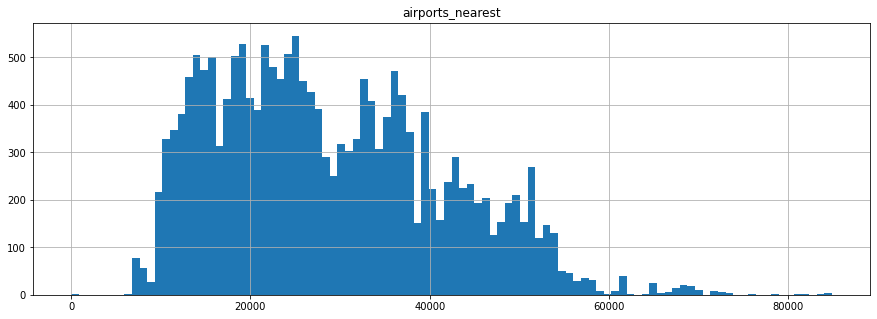

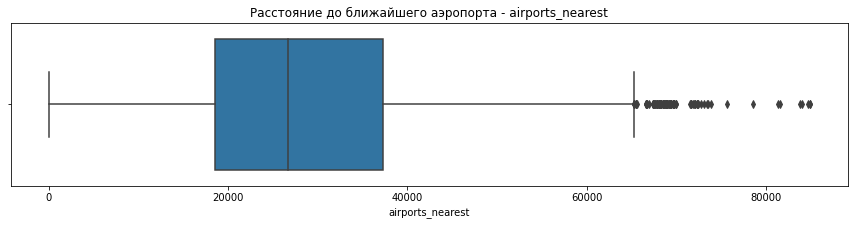

In [117]:
#расстояние до ближайшего аэропорта;
data.hist('airports_nearest', bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Расстояние до ближайшего аэропорта - airports_nearest")
sns.boxplot(x='airports_nearest', data=data) #good_price[good_price['cityCenters_nearest']<15]
print('Данные по расстоянию от ближайшего аэтопорта - нормальные.')
print('выбросов, которые сильно могли бы повлиять а результат не наблюдается.')
print('единственно - минимальное рассояние по срезу 0м, это странно, избавимся от него')
data['airports_nearest'].describe()

In [118]:
data_faer = data[data['airports_nearest']>0]
print (f'Теперь минимальное значение равно {format(data_faer["airports_nearest"].min(), ".1f")} м - это больше похоже на правду')
print (f'Среднее расстояние({format(data_faer["airports_nearest"].mean(), ".1f")} м) и медиана ({data_faer["airports_nearest"].median()} м) практически совпадают')
data_faer['airports_nearest'].describe()

Теперь минимальное значение равно 6450.0 м - это больше похоже на правду
Среднее расстояние(28795.3 м) и медиана (26726.0 м) практически совпадают


count   18,156.0
mean    28,795.3
std     12,629.4
min      6,450.0
25%     18,585.0
50%     26,726.0
75%     37,273.5
max     84,869.0
Name: airports_nearest, dtype: float64

count   8,079.0
mean      490.8
std       342.3
min         1.0
25%       288.0
50%       455.0
75%       612.0
max     3,190.0
Name: parks_nearest, dtype: float64

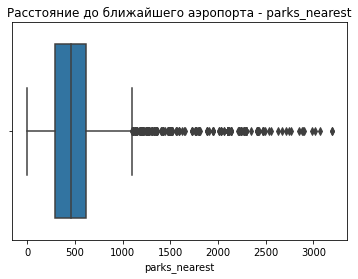

In [119]:
#Расстояние до ближайшего парка; 
plt.title("Расстояние до ближайшего аэропорта - parks_nearest")
sns.boxplot(x='parks_nearest', data=data)
data['parks_nearest'].describe()

Теперь данные можно анализировать
Минимальное значение равно 1.0 м
Среднее расстояние(429.2 м) и медиана (439.0 м) практически совпадают


count   7,610.0
mean      429.2
std       202.9
min         1.0
25%       278.0
50%       439.0
75%       580.0
max       917.0
Name: parks_nearest, dtype: float64

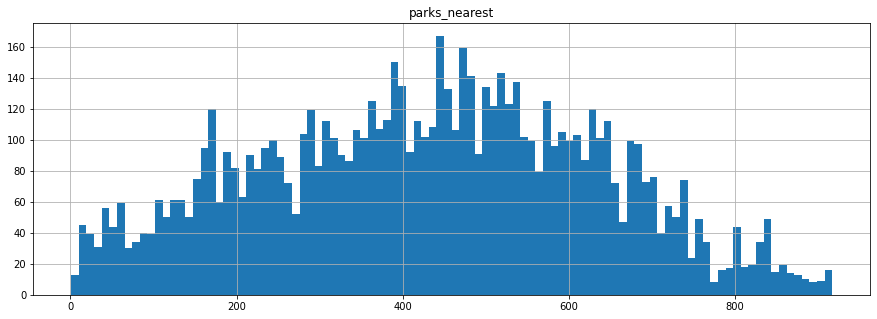

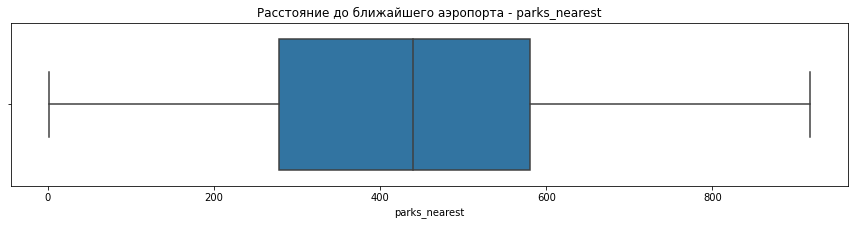

In [120]:
#Сделаем данные более чистыми - отсечем по усам неинформативную информацию'
data_fp = data[(data['parks_nearest']< 918)]
print('Теперь данные можно анализировать')
print (f'Минимальное значение равно {format(data_fp["parks_nearest"].min(), ".1f")} м')
print (f'Среднее расстояние({format(data_fp["parks_nearest"].mean(), ".1f")} м) и медиана ({data_fp["parks_nearest"].median()} м) практически совпадают')
#data.hist('parks_nearest', figsize=(5,5))

data_fp.hist('parks_nearest', bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Расстояние до ближайшего аэропорта - parks_nearest")
sns.boxplot(x='parks_nearest', data=data_fp) #good_price[good_price['cityCenters_nearest']<15]
data_fp['parks_nearest'].describe()

#### **Предварительные выводы:**
- Аномалий в расстояниях до центра нет - все данные реальные.
Большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра.
- Данные по расстоянию от ближайшего аэропорта - нормальные.
выбросов, которые сильно могли бы повлиять а результат не наблюдается.
единственно - минимальное рассояние по срезу 0 м, это странно, от него избавилась. 
> после отчистки данных минимальное значение стало 6450 м - это больше похоже на правду. Среднее расстояние(28795.2 м) и медиана (26726 м) практически совпадают.
- При работе с расстоянием до ближайшего парка очистила по усам (918 м) -  данные в результате: 
> Минимальное значение равно 1.0 м. Среднее расстояние(429.2 м) и медиана (439.0 м) практически совпадают

### **3.5 Исследовательский анализ (продолжение- weekday)**
  - день и месяц публикации объявления

Чаще всего объявления размещают в будни в четверг. Меньше всего на выходных в воскресенье


3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

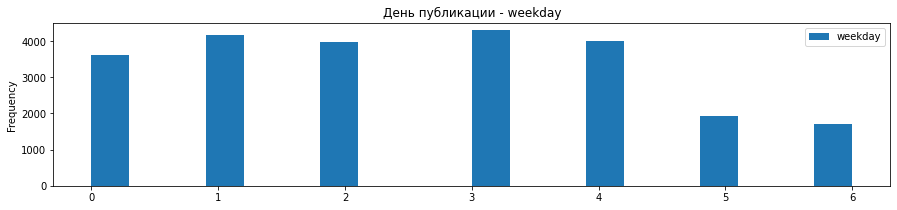

In [121]:
#день публикации объявления - weekday
print('Чаще всего объявления размещают в будни в четверг. Меньше всего на выходных в воскресенье')
data.plot(y='weekday', kind='hist', bins=20, figsize=(15,3))
#data['weekday'].hist(bins=20, figsize=(15, 5))
plt.title("День публикации - weekday")
data['weekday'].value_counts()

Наблюдается небольшая сезонность - чаще объявления выкладывают:с октября по апрель;
В мае и январе самая низкая активность, в феврале - наиболее высокая
Можно точно утверждать, что в наши большие праздники объявления выкладывают меньше всего


2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

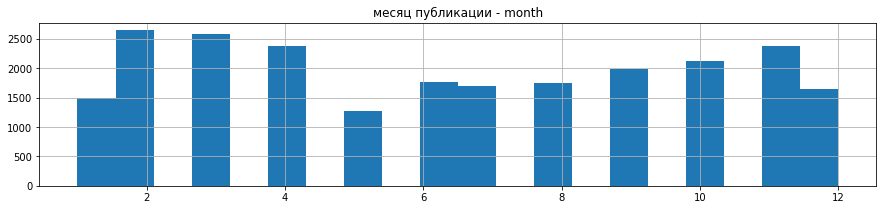

In [122]:
#Месяц публикации объявления - month
print('Наблюдается небольшая сезонность - чаще объявления выкладывают:с октября по апрель;')
print('В мае и январе самая низкая активность, в феврале - наиболее высокая')
print('Можно точно утверждать, что в наши большие праздники объявления выкладывают меньше всего')
#data.plot(y='month', kind='hist', bins=20, figsize=(15,3))
data['month'].hist(bins=20, figsize=(15, 3))
plt.title("месяц публикации - month")
data['month'].value_counts()

#### **Предварительные выводы:**
- Чаще всего объявления размещают в будни в четверг. Меньше всего на выходных в воскресенье
- Наблюдается небольшая сезонность - чаще объявления выкладывают:с октября по апрель;
> В мае и январе самая низкая активность, в феврале - наиболее высокая
Можно точно утверждать, что в наши большие праздники объявления выкладывают меньше всего

### **3.6 Исследовательский анализ (продолжение- days_exposition)**
- Изучим, как **быстро продавались квартиры** (столбец `days_exposition`). Этот параметр показывает, сколько дней «висело» каждое объявление.

    - Построим гистограмму.
    - Посчитаем среднее и медиану.
    - Опишем, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими"


NaN        3181
45.0        880
60.0        538
7.0         234
30.0        208
           ... 
1,114.0       1
1,105.0       1
920.0         1
1,135.0       1
1,174.0       1
Name: days_exposition, Length: 1142, dtype: int64
Видим яркие пики 7, 30, 45, 60 и 90 дней - определим , чем это вызвано


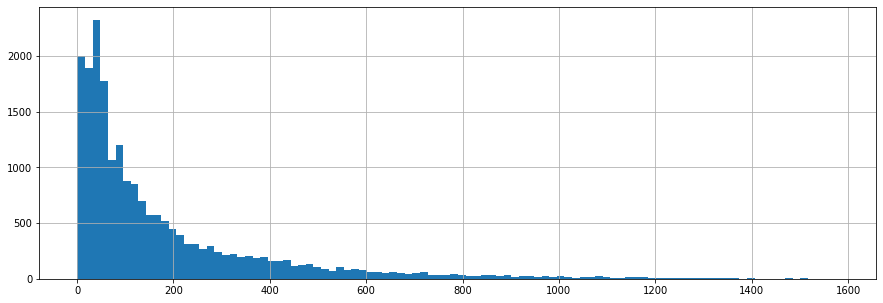

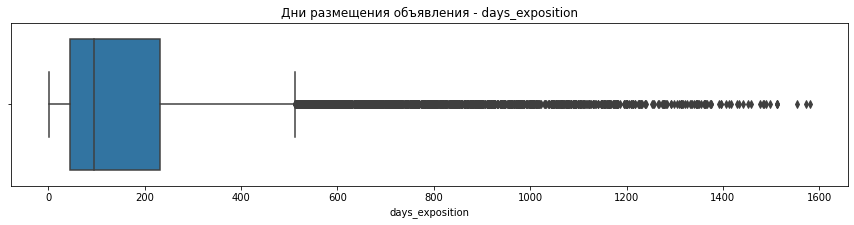

In [123]:
#Построим гистограмму, а также вернемся к ярким пикам
print(data['days_exposition'].value_counts(dropna=False))
data['days_exposition'].hist(bins=100, figsize=(15, 5))
plt.subplots(figsize=(15, 3))
plt.title("Дни размещения объявления - days_exposition")
sns.boxplot(x='days_exposition', data=data)
print('Видим яркие пики 7, 30, 45, 60 и 90 дней - определим , чем это вызвано')

Предположение, что это выбросы - вызванные обновлением объявлений судя по графику может быть правдой,
так как пики по годам полностью совпадают. Удалим их - и будем исследовать наши данные далее


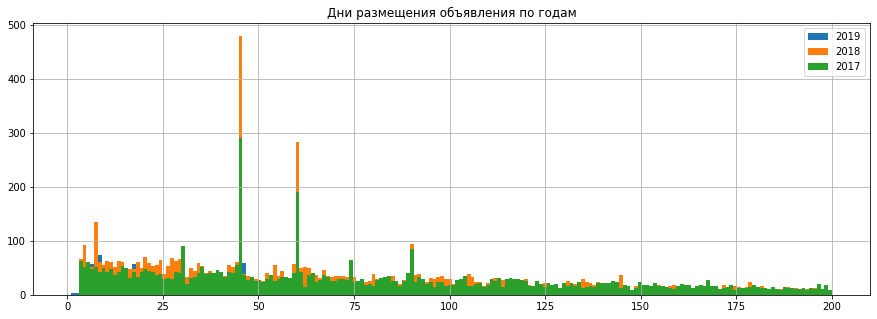

In [124]:
#проверим пики по годам, возьмем 2017, 2018, 2019 года.
#есть предположение, что это выбросы - вызванные обновлением объявлений.
data_2017=data[data['year']==2017]
data_2018=data[data['year']==2018]
data_2019=data[data['year']==2019]
data_2019['days_exposition'].hist(bins=100, range=(1, 200), figsize=(15, 5), label = '2019')
plt.title("Дни размещения объявления по годам")
plt.legend()
data_2018['days_exposition'].hist(bins=200, range=(1, 200), figsize=(15, 5), label = '2018')
plt.legend()
data_2017['days_exposition'].hist(bins=200, range=(1, 200), figsize=(15, 5), label = '2017')
plt.legend()
print('Предположение, что это выбросы - вызванные обновлением объявлений судя по графику может быть правдой,')
print('так как пики по годам полностью совпадают. Удалим их - и будем исследовать наши данные далее')

In [125]:
good_de = data.query('(days_exposition != 45) and (days_exposition != 30) and (days_exposition != 60) and (days_exposition != 90) and (days_exposition != 7)')
print(f'Таким образом, время размещения очищенных данных составляет:')
print(f' медианное  - {good_de["days_exposition"].median()} дней, среднее {format(good_de["days_exposition"].mean(), ".0f")}, минимальное - {good_de["days_exposition"].min()} день; максимальное  - {good_de["days_exposition"].max()} дней.')
print('Мы видим, что при удалении предполагаемых аномалий - разница между средним и медианным значенимями немного уменьшилась:')
print(f'медианное  и среднее были {data["days_exposition"].median()} и {format(data["days_exposition"].mean(), ".0f")} соответственно.')
good_de['days_exposition'].describe()

Таким образом, время размещения очищенных данных составляет:
 медианное  - 104.0 дней, среднее 188, минимальное - 1.0 день; максимальное  - 1580.0 дней.
Мы видим, что при удалении предполагаемых аномалий - разница между средним и медианным значенимями немного уменьшилась:
медианное  и среднее были 95.0 и 181 соответственно.


count   19,538.0
mean       187.9
std        222.8
min          1.0
25%         45.0
50%        104.0
75%        244.0
max      1,580.0
Name: days_exposition, dtype: float64

In [126]:
#data[data['days_exposition']==45]

count   19,538.0
mean       187.9
std        222.8
min          1.0
25%         45.0
50%        104.0
75%        244.0
max      1,580.0
Name: days_exposition, dtype: float64

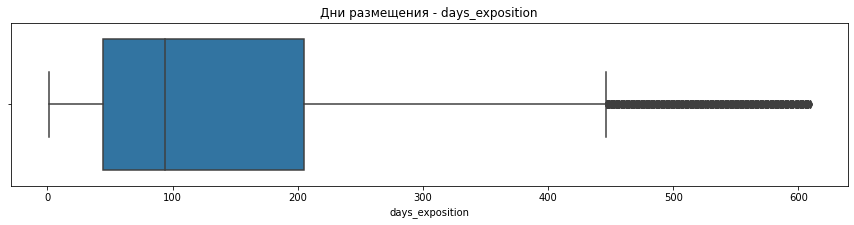

In [127]:
#Построим гистограммы и boxplot у отфильтрованных данных.
#отсечем малочастотное время и еще раз найдем квартили (возьмем верхнюю часть усов - 610)
plt.subplots(figsize=(15, 3))
plt.title("Дни размещения - days_exposition")
sns.boxplot(x='days_exposition', data=good_de[good_de['days_exposition']<610])
good_de['days_exposition'].describe()



In [128]:
#Рассмотрим информацию о необычайно быстрых и необычайно медленных продажах
#print(data[data['days_exposition']>1500].value_counts())
data_de_big=data.pivot_table(index=['locality_name','last_price','living_area', 'cityCenters_nearest_km'], values ='days_exposition', aggfunc='max')
data_de_big = data_de_big.reset_index()
display(data_de_big.query('days_exposition > 1500'))

data_de_max=data.pivot_table(index=['locality_name','last_price'], values ='days_exposition', aggfunc='max')
data_de_max = data_de_max.reset_index()
display(data_de_max.query('days_exposition > 1550'))

data_de_max=data.pivot_table(index=['locality_name','last_price'], values ='days_exposition', aggfunc='min')
data_de_max = data_de_max.reset_index()
display(data_de_max.query('days_exposition <= 1'))


,locality_name,last_price,living_area,cityCenters_nearest_km,days_exposition
1857,пушкин,"4,400,000.0",18.7,30.4,"1,512.0"
13831,санкт-петербург,"10,600,000.0",44.0,17.1,"1,553.0"
14523,санкт-петербург,"13,300,000.0",42.7,11.1,"1,513.0"
14528,санкт-петербург,"13,300,000.0",58.0,5.0,"1,512.0"
15433,санкт-петербург,"34,878,556.0",58.3,0.3,"1,572.0"


,locality_name,last_price,days_exposition
2657,поселок новое девяткино,"3,500,000.0","1,580.0"
5360,санкт-петербург,"10,600,000.0","1,553.0"
5907,санкт-петербург,"34,878,556.0","1,572.0"


,locality_name,last_price,days_exposition
4253,санкт-петербург,"4,000,000.0",1.0


#### **Предварительные выводы:**
Согласно расчетам среднее время размещения объявления очищенных данных составляет:
медианное  - 104 дня, среднее 188, минимальное - 1.0 день; максимальное  - 1580.0 дней.
>Мы видим, что при удалении предполагаемых аномалий - разница между средним и медианным значенимями немного уменьшилась:
медианное  и среднее были 95.0 и 181 соответственно.
По усам можно ограничивать рассчеты по дням в 440 дней и с ними работать.
Но на мой взгляд, лучше использовать чистые данные, так как неясно почему точно возникли эти аномальные пики (7, 30, 45, 60 и 90 дней) - надо уточнять у тех, кто эти данные предоставил, потом только принимать решения - удалять их или нет.
 
Необычно маленькое время сделки - 1 день:
> Минимально время показывает - 1 день, в принципе возможно, но очень быстро: санкт-петербург -	4,000,000 млн. Ценя небольшая для города, вполне возсможно, что и договоренность была.


Если коворить о необычно долгих продажах - более 4 лет (больше 1500 дней):
> самая длинная продажа 1580 дней вызвана, скорее всего, удаленностью от центра - Поселок Путилково.
> Вторая долгая сделка в  1,572 дней  уже в СПБ - явно дорогая квартира дорогие по цене 34,878,556 руб., расположена близко к центру.

### **3.7 Исследовательский анализ(продолжение)**: 
- Определим **факторы больше всего влияют на общую (полную) стоимость объекта**? 
- Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы используем сводные таблицы:

        - общей площади; 
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

Коэффициент кореляции Пирсона равен 0.74
Выявлено следующее количество дубликатов 1670
Можно предположить, что одни и те же объявления размещались несколько раз
удаляем их, за верный принимаем последний дубликат


,total_area,mean_price_mln,median_price_mln,count_price_mln
927,60.0,5.5,5.2,344
605,45.0,4.0,4.0,417
471,40.0,3.9,4.0,315
554,43.0,3.9,3.8,301
530,42.0,3.8,3.9,383
581,44.0,3.6,3.8,345
180,31.0,2.9,3.0,346


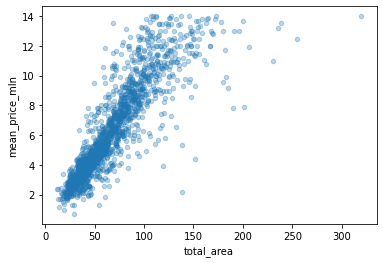

In [129]:
#Построим графики зависимости цены от общей площади
#Будем использовать уже отчищенные , хорошие даные и для цены и для общей площади 
good_ta = data.query('last_price_mln <= 14')
data_pr_ta=good_ta.pivot_table(index=['total_area'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
good_ta['total_area'].corr(good_ta['last_price'])
data_pr_ta.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_ta = data_pr_ta.reset_index()
#display(data_pr_ta.tail(10))
data_pr_ta.plot(x='total_area', y='mean_price_mln', kind='scatter', alpha=0.3) 
#data_pr_ta.plot(x='total_area', y='mean_price_mln', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True)
print(f'Коэффициент кореляции Пирсона равен {format(good_ta["total_area"].corr(good_ta["last_price"]), ".2f")}')
print('Выявлено следующее количество дубликатов', data_pr_ta['count_price_mln'].duplicated().sum())
print('Можно предположить, что одни и те же объявления размещались несколько раз')
print('удаляем их, за верный принимаем последний дубликат')
data_pr_ta1 = data_pr_ta.drop_duplicates(subset=['count_price_mln'], keep='last')
#Посчитаем какое количество квартир по средней цене встречается чаще
data_pr_ta[data_pr_ta['count_price_mln'] > 300].sort_values('mean_price_mln', ascending = False)
#print(data_pr_ta1[data_pr_ta1.duplicated(['count_price_mln'])])
#data_pr_ta.groupby('count_price_mln').median()

#### **Предварительные выводы:**
Коэффициент кореляции Пирсона равен **0.74** - видим сильную линейную зависимость.
Это значит, что че больше общая площадь квартиры, тем больше ее стоимость. Что в принципе логично. Больше всего предложений в с общей площадью **45 м.кв.** со средней стоимостью **4 млн руб.** (что соответствует данным о 2 и однокомнатных квартирах)
Также нашла 1672 дубликатов по цене - можно предположить, что одни и те же объявления размещались несколько раз. 

При проверке выяснилось - что эти дубликаты на общую картину не оказывают существенное влияние.
В дальнейшем не будем их проверять.

#### Построим графики зависимости цены от жилой площади

Коэффициент кореляции Пирсона равен 0.60


,living_area,mean_price_mln,median_price_mln,count_price_mln
683,32.0,4.8,4.7,317
609,30.0,4.7,4.2,2341
646,31.0,4.7,4.6,377
363,20.0,4.2,4.0,478
572,29.0,4.1,4.0,318
499,27.0,4.1,4.0,311
530,28.0,4.1,3.9,423
345,19.0,3.9,3.8,329
138,15.0,3.5,3.4,312
200,16.0,3.5,3.4,486


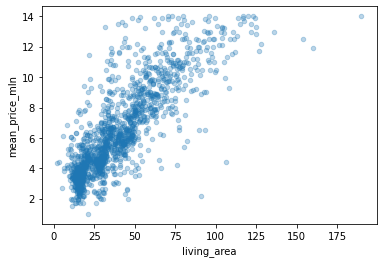

In [130]:
#Будем использовать также отчищенные , хорошие даные и для цены и для жилой площади 
good_la = data.query('last_price_mln <= 14')
data_pr_la=good_la.pivot_table(index=['living_area'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
good_la['living_area'].corr(good_la['last_price_mln'])
data_pr_la.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_la = data_pr_la.reset_index()
#display(data_pr_la.tail(10))
data_pr_la.plot(x='living_area', y='mean_price_mln', kind='scatter', alpha=0.3) 
#data_pr_la.plot(x='living_area', y='mean_price_mln', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True)
print(f'Коэффициент кореляции Пирсона равен {format(good_la["living_area"].corr(good_ta["last_price_mln"]), ".2f")}')
#print('Выявлено следующее количество дубликатов', data_pr_la['count_price_mln'].duplicated().sum())
#print('Можно предположить, что одни и те же объявления размещались несколько раз')
#print('удаляем их, за верный принимаем последний дубликат')
#data_pr_la1 = data_pr_la.drop_duplicates(subset=['count_price_mln'], keep='last')
#Посчитаем какое количество квартир по средней цене встречается чаще
data_pr_la[data_pr_la['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

#### **Предварительные выводы:**
Также видим линейную зависимость.Но коэффициент **кореляции Пирсона** равен **0.60** - что говорит о значительно меньшей зависимости цены от размера жилой площади.
Все-таки общая площадь играет большую роль для формирования цены.

Тем не менее наблюдаем также, что в большинстве случаев, чем больше жилая площадь квартиры, тем больше ее стоимость. Что в принципе также логично. Больше всего предложений в с жилой площадью **30 м.кв.** со средней стоимостью **4,7 млн руб.**(но будем учитывать, что большиство пропусков по жилой площади было заменено именно этой цифрой, так как по расчертам это медианный показатель).
Поэтому имеет смысла сказаить от втором месте по чатоте предложений квартиры: с жилой площадью **18 м.кв.** со средней стоимостью **3,5 млн руб**. 
Все эти жанные также отражают результаты нашего анализа о большинстве предложений по 2  и однокомнатным квартирам.


#### Построим графики зависимости цены от площади кухни

Коэффициент кореляции Пирсона равен 0.48


,kitchen_area,mean_price_mln,median_price_mln,count_price_mln
548,15.0,7.4,7.2,305
516,14.0,7.2,6.6,344
411,12.0,6.4,6.0,622
342,11.0,5.7,5.0,783
269,10.0,5.2,4.8,1229
139,8.0,4.6,4.3,1099
201,9.0,4.5,4.0,1089
21,5.0,4.4,3.7,2495
172,8.5,4.1,3.8,415
103,7.0,4.1,4.0,1059


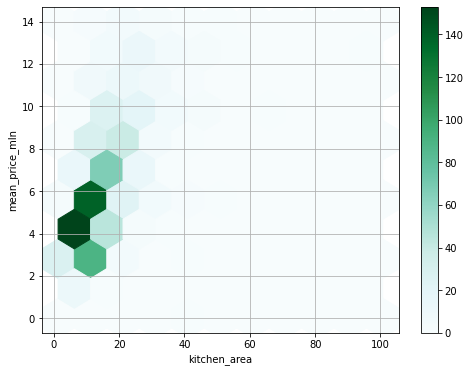

In [131]:
#Будем использовать также отчищенные, хорошие даные 
good_ka = data.query('last_price_mln <= 14')
data_pr_ka=good_ka.pivot_table(index=['kitchen_area'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
data['kitchen_area'].corr(data['last_price_mln'])
data_pr_ka.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_ka = data_pr_ka.reset_index()
#data_pr_ka.plot(x='kitchen_area', y='mean_price_mln', kind='scatter', alpha=0.3) 
data_pr_ka.plot(x='kitchen_area', y='mean_price_mln', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True)
print(f'Коэффициент кореляции Пирсона равен {format(good_ka["kitchen_area"].corr(good_ka["last_price_mln"]), ".2f")}')
#отсортируем площадь кухонь по средней цене
data_pr_ka[data_pr_ka['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

#### **Предварительные выводы:**
В случае с площадью кухни, также наблюдается прямая линейная зависимость, но уже более слабая (коэффициент **кореляции Пирсона** равен **0.48**)
Но общая тенденция также сохраняется - чем больше площадь кухни, тем больше стоимость. Но опять же а формарование цены  влияет общая площадь квартиры.

### **3.8 Исследовательский анализ (продолжение)**
- Рассчитаем **факторы больше всего влияют на общую (полную) стоимость объекта** 
- Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией используем сводные таблицы:

    - количество комнат;
    - типа этажа, на котором расположена квартира (первый, последний, другой);


#### Построим графики зависимости цены от количество комнат

,rooms,mean_price_mln,median_price_mln,count_price_mln
0,0,2.9,2.7,195
1,1,3.8,3.6,8022
2,2,5.1,4.7,7726
3,3,6.4,5.9,5282
4,4,7.7,7.5,871
5,5,9.7,10.2,169
6,6,11.4,12.0,34
7,7,12.3,13.2,6


Коэффициент кореляции Пирсона равен 0.49


,rooms,mean_price_mln,median_price_mln,count_price_mln
4,4,7.7,7.5,871
3,3,6.4,5.9,5282
2,2,5.1,4.7,7726
1,1,3.8,3.6,8022


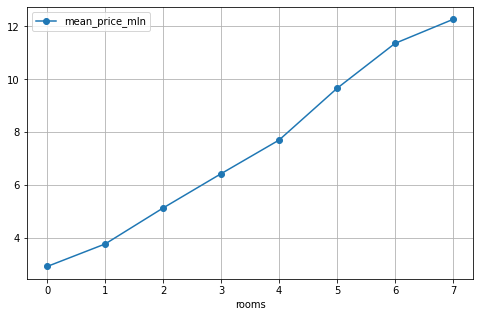

In [132]:
#Построим графики зависимости цены от количество комнат
#Будем использовать отчищенные, хорошие даные
good_room = data.query('last_price_mln <= 14')
data_pr_room=good_room.pivot_table(index=['rooms'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
good_room['rooms'].corr(good_room['last_price'])
data_pr_room.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_room = data_pr_room.reset_index()
display(data_pr_room)
#data_pr_room.plot(x='rooms', y='mean_price_mln', kind='scatter', alpha=0.3) 
data_pr_room.plot(x='rooms', y='mean_price_mln', style='o-', figsize=(8, 5), sharex=False, grid=True)
print(f'Коэффициент кореляции Пирсона равен {format(good_room["rooms"].corr(good_room["last_price"]), ".2f")}')
#Посчитаем какое количество комнат квартир по средней цене встречается чаще
data_pr_room[data_pr_room['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

#### **Предварительные выводы:**
Коэффициент **кореляции Пирсона** равен **0.49** - что говорит о прямой зависимости стоимости квартиры от количества комнат.
Как уже ранее выявили, наиболее часто встречаются объвления **1-комнатных квартир, средняя цена которых 3,8 млн руб**., на несколько порядков меньше (всего 7 предложений) - 7 комнатные квартиры.

> Интересен тот факт, что при использовании цены неотфильтрованных данных - коэффициент Пирсона составляет 0,53. Но решила не использовать их в анализе, так как все квартиры с количеством комнат больше 7 - по количеству объявлений не более 2-3, а чаще 1. Как, к примеру, объявление с 19-комнатной квартирой.
Считаю для таких уникальных случаев надо провожить отдельный анализ. Сейчас у нас другая задача.

#### **Построим графики зависимости цены от типа этажа, на котором расположена квартира (первый, последний, другой)**.

,floors_category,mean_price_mln,median_price_mln,count_price_mln
0,другой,5.3,4.7,16377
2,последний,4.7,4.1,3084
1,первый,4.2,3.9,2844


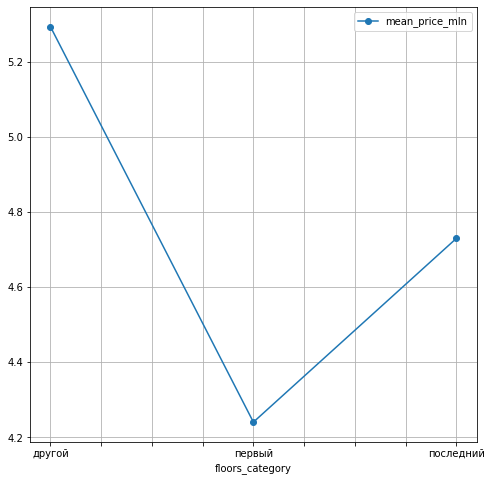

In [133]:
#Будем использовать также отчищенные , хорошие даные и для цены и для общей площади
#checkеd_floors = data.pivot_table(index=['floors_category','floor'], values= 'floors_total', aggfunc='count')
good_fc = data.query('last_price_mln <= 14')
data_pr_fc=good_fc.pivot_table(index=['floors_category'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
#good_fc['floors_category'].corr(good_fc['last_price'])
data_pr_fc.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_fc = data_pr_fc.reset_index()
#display(data_pr_la.tail(10))
data_pr_fc.plot(x='floors_category', y='mean_price_mln', style='o-', figsize=(8, 8), sharex=False, grid=True)
#print(f'Коэффициент кореляции Пирсона равен {format(good_fc["floors_category"].corr(good_fc["last_price"]), ".2f")}')

#Посчитаем среднюю стоимость квартир по категориям этажей
data_pr_fc[data_pr_fc['count_price_mln'] > 300].sort_values(['count_price_mln'], ascending = [False] )
#print(data_pr_ta1[data_pr_ta1.duplicated(['count_price_mln'])])
#data_pr_ta.groupby('count_price_mln').median()

#### **Предварительные выводы:**

**Этажность влияет** на стоимость квартир - но она не линейная.
Анализ данных показал, что наиболее дешевые квартиры находятся на 1 этаже.
Квартиры на последних этажах также чуть меньше в цене.
Наибольшая средняя стоимость у остальных квартир.


### **3.9 Исследовательский анализ(продолжение)**
- Рассчитаем **факторы больше всего влияют на общую (полную) стоимость объекта**? 
- Построим графики, которые покажут зависимость цены от указанных ниже параметров. 

#### Построим графики зависимости цены от даты размещения (день недели, месяц, год)

In [134]:
#Будем использовать также отчищенные , хорошие даные и для цены и для общей площади 
good_wmy = data.query('last_price_mln <= 14')
data_pr_w=good_wmy.pivot_table(index='weekday', values ='last_price_mln', aggfunc=['mean','median', 'count'])
data_pr_m=good_wmy.pivot_table(index='month', values ='last_price_mln', aggfunc=['mean','median', 'count'])
data_pr_y=good_wmy.pivot_table(index='year', values ='last_price_mln', aggfunc=['mean','median', 'count'])
good_wmy['weekday'].corr(good_wmy['last_price'])
good_wmy['month'].corr(good_wmy['last_price'])
good_wmy['year'].corr(good_wmy['last_price'])
data_pr_m.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_w.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_y.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_m = data_pr_m.reset_index()
data_pr_w = data_pr_w.reset_index()
data_pr_y = data_pr_y.reset_index()
print(f'Коэффициент кореляции Пирсона недели равен {format(good_wmy["weekday"].corr(good_wmy["last_price"]), ".2f")}')
print(f'Коэффициент кореляции Пирсона месяца равен {format(good_wmy["month"].corr(good_wmy["last_price"]), ".2f")}')
print(f'Коэффициент кореляции Пирсона года равен {format(good_wmy["year"].corr(good_wmy["last_price"]), ".2f")}')
#Посчитаем какое количество квартир по средней цене публикуется на продажу по дням недели
data_pr_w[data_pr_w['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

Коэффициент кореляции Пирсона недели равен -0.02
Коэффициент кореляции Пирсона месяца равен 0.00
Коэффициент кореляции Пирсона года равен -0.02


,weekday,mean_price_mln,median_price_mln,count_price_mln
1,1,5.2,4.6,3961
2,2,5.1,4.5,3723
0,0,5.1,4.5,3403
3,3,5.1,4.5,3993
4,4,5.0,4.5,3783
6,6,5.0,4.5,1613
5,5,4.9,4.5,1829


In [135]:
#В месяц
data_pr_m[data_pr_m['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

,month,mean_price_mln,median_price_mln,count_price_mln
8,9,5.2,4.5,1864
3,4,5.2,4.7,2245
6,7,5.1,4.5,1595
10,11,5.1,4.5,2222
7,8,5.1,4.5,1650
4,5,5.1,4.4,1198
1,2,5.1,4.5,2483
2,3,5.1,4.5,2443
11,12,5.1,4.5,1534
0,1,5.1,4.5,1400


In [136]:
#По годам
data_pr_y[data_pr_y['count_price_mln'] > 300].sort_values(['mean_price_mln'], ascending = [False] )

,year,mean_price_mln,median_price_mln,count_price_mln
1,2015,5.6,5.0,1062
5,2019,5.4,4.9,2699
2,2016,5.1,4.4,2608
3,2017,5.0,4.3,7716
4,2018,5.0,4.5,8119


<AxesSubplot:xlabel='year'>

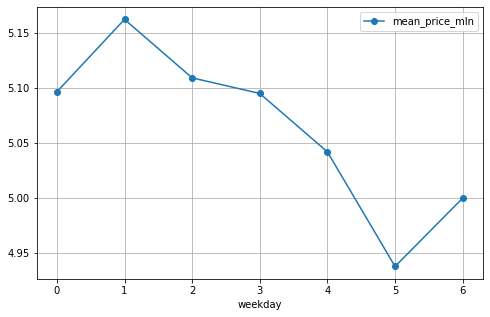

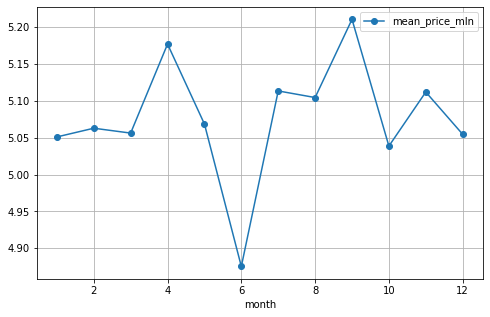

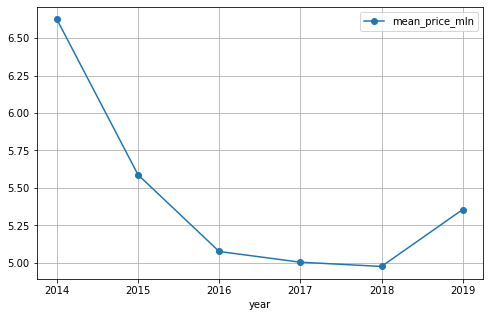

In [137]:
#data_pr_m.plot(x='weekday', y='mean_price_mln', kind='hexbin', gridsize=20, figsize=(8, 5), sharex=False, grid=True)
data_pr_w.plot(x='weekday', y='mean_price_mln', style='o-', figsize=(8, 5), sharex=False, grid=True)
data_pr_m.plot(x='month', y='mean_price_mln', style='o-', figsize=(8, 5), sharex=False, grid=True)
data_pr_y.plot(x='year', y='mean_price_mln', style='o-', figsize=(8, 5), sharex=False, grid=True)

#### **Предварительные выводы:**

Коэффициент Пирсона очень мал во всех трех случаях - это говорито том, что стоимость квартиры не зависит ни от дня недели, ни от месяца, ни от года. Эти величины независят друг от друга.
Едиственно по графикам можно сказать, что:
- В субботу выкладывается наименьшее количество объявлений, а также с меньшей стоимостью квартиры. Самые дорогие квартиры выкладываются в понедельник. Вероятно, это связано с выходнами. Люди на работе - занимаются продажами - в выходные отдыхают.
- Большее количество объявлений по самой низкой цене выкладывают в июне, меньше всего объявлений в принципе выкладываются в мае. Вероятно - это связано с праздниками в мае и началом сезона отпусков в июне. Самая высокая стоимость в сентябре. Определенно присутствует сезонность - связанная с работой, выходными и праздниками. Очень похожа на рынок труда.
- Начиная с 2014 года шел сильный спад стоимости недвижимости. Вызванный с большой долей вероятности кризисными явлениями после 2014 года. Самая низкая стоимость жилья была в 2018 году - вот тогда надо было покупать:)
в 2019 году начался уже рост стоимости жилья. Интересно, как ведет себя рынок жилья в этом году).

### **3.10 Исследовательский анализ(продолжение)**

- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [138]:
import warnings

warnings.filterwarnings("ignore")
#посчитаем цену квадратного метра по всем столбцам и добавим новый столбец
data['price_sm'] = data['last_price'] / data['total_area']
data['price_sm'] = data['price_sm'].astype('int')
#print(data['price_sm'].sort_values)
#Выведем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
data_pr_sm=data.pivot_table(index=['locality_name'], values ='price_sm', aggfunc=['mean', 'count'])
data_pr_sm.columns = ['mean_price', 'count_price']
data_pr_sm = data_pr_sm.reset_index()
#display(data_pr_sm.sort_values(['count_price'], ascending = [False]).head(10))
data_pr_sm10=data_pr_sm.query('count_price > 236').sort_values(['count_price'], ascending = [False])
display(data_pr_sm10)
#рассчитаем максимальную и минимальную стоимость квартиры
max=data_pr_sm['mean_price'].max()
min=data_pr_sm['mean_price'].min()
display(data_pr_sm.query('mean_price == @max'))
data_pr_sm[data_pr_sm['mean_price']==data_pr_sm['mean_price'].min()]
#попробовала разные методы

,locality_name,mean_price,count_price
302,санкт-петербург,"114,848.6",15721
154,поселок мурино,"85,681.3",556
292,поселок шушары,"78,676.9",440
3,всеволожск,"68,654.0",398
301,пушкин,"103,125.4",369
13,колпино,"75,424.2",338
175,поселок парголово,"90,175.5",327
6,гатчина,"68,745.7",307
118,поселок кудрово,"92,473.1",299
4,выборг,"58,141.5",237


,locality_name,mean_price,count_price
7,зеленогорск,"115,122.5",24


,locality_name,mean_price,count_price
250,поселок старополье,"11,206.0",3


#### **Предварительные выводы:**

Самая дорогая квартира находится в Зеленогорске = **115 122,5 руб за кв.м**  (Интересно было бы посмотреть на эту квартиру).

Самая дешевая - в поселке Старополье з**а 11 206 за кв.м.**. разница практически в 10 раз отличается.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Определим, как стоимость объектов зависит от расстояния до центра города."

In [139]:
import warnings

warnings.filterwarnings("ignore")
#Посчитаем среднюю цену каждого километра в Санкт-Петербурге
data['price_skm'] = data['last_price_mln'] / data['cityCenters_nearest_km']
#(data.query('locality_name == "санкт-петербург"')['price_skm']).mean()
data.query('locality_name == "санкт-петербург"').pivot_table(index=['locality_name'], values ='price_skm', aggfunc='mean')

,price_skm
locality_name,
санкт-петербург,1.5


In [140]:
import warnings
warnings.filterwarnings("ignore")

#Ранее мы рассчитали, что большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра
#используем эти данные для анализа, также используем хорошие данные по цене good_lр
good_сс=good_la[(good_la['cityCenters_nearest_km']< 21)&(data['cityCenters_nearest_km']> 9)]
data_pr_cc=good_сс.pivot_table(index=['cityCenters_nearest_km'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
#data['cityCenters_nearest_km'].corr(data['last_price_mln'])
data_pr_cc.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_cc = data_pr_cc.reset_index()
display(data_pr_cc)

,cityCenters_nearest_km,mean_price_mln,median_price_mln,count_price_mln
0,9.0,5.0,5.0,1
1,9.0,4.6,4.6,2
2,9.0,9.3,9.3,1
3,9.0,6.1,5.7,3
4,9.0,13.5,13.5,1
...,...,...,...,...
3904,20.9,3.4,3.4,2
3905,20.9,4.4,4.4,1
3906,20.9,2.8,2.8,1
3907,20.9,3.8,3.8,1


#### посчитаем зависимость стоимости объектов от расстояния до центра города

,cityCenters_nearest_km,mean_price_mln,median_price_mln,count_price_mln
1029,11.8,14.0,14.0,1
1941,13.5,14.0,14.0,1
781,11.2,14.0,14.0,1
656,11.0,13.9,13.9,1
3196,16.1,13.8,13.8,1
...,...,...,...,...
3764,18.5,2.2,2.2,5
3709,18.0,2.2,2.2,1
2910,15.5,2.2,2.2,1
49,9.2,2.2,2.2,1


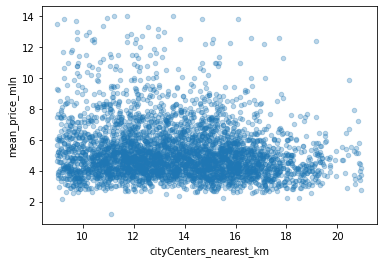

In [141]:
import warnings
warnings.filterwarnings("ignore")

#Ранее мы рассчитали, что большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра
#используем эти данные для анализа, также используем хорошие данные по цене good_la
good_сс=good_la[(good_la['cityCenters_nearest_km']< 21)&(data['cityCenters_nearest_km']> 9)]
data_pr_cc=good_сс.pivot_table(index=['cityCenters_nearest_km'], values ='last_price_mln', aggfunc=['mean','median', 'count'])
#data['cityCenters_nearest_km'].corr(data['last_price_mln'])
data_pr_cc.columns = ['mean_price_mln','median_price_mln', 'count_price_mln']
data_pr_cc = data_pr_cc.reset_index()
data_pr_cc.plot(x='cityCenters_nearest_km', y='mean_price_mln', kind='scatter', alpha=0.3) 
#data_pr_cc.plot(x='cityCenters_nearest_km', y='mean_price_mln', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True)

#Посчитаем какое количество квартир по средней цене встречается чаще
data_pr_cc.sort_values(['mean_price_mln'], ascending = [False] )


,cityCenters_nearest_km,mean_price_skm
0,0.2,171.8
1,0.2,27.9
2,0.2,51.1
3,0.3,33.4
4,0.3,39.5
...,...,...
6294,28.6,0.2
6295,28.8,0.2
6296,29.3,0.2
6297,29.3,0.1


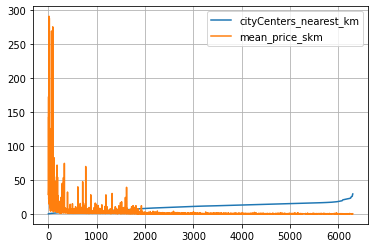

In [142]:
import warnings

warnings.filterwarnings("ignore")
data_spb_cprice= data.query('locality_name == "санкт-петербург"').pivot_table(index =['cityCenters_nearest_km'], values = 'price_skm', aggfunc = 'mean')
data_spb_cprice.columns=['mean_price_skm']
data_spb_cprice = data_spb_cprice.reset_index()
data_spb_cprice.plot(sharex=False, grid=True)
#data_spb_cprice.plot(x='price_skm', y='cityCenters_nearest_km', kind='scatter', alpha=0.3) 
#data_spb_cprice.plot(x='cityCenters_nearest_km', y='price_skm', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True)
#data_spb_cprice.plot(x='cityCenters_nearest_km', y='price_skm', style='o-', figsize=(8, 8), sharex=False, grid=True)
#print(f'Коэффициент кореляции Пирсона равен {format(data["cityCenters_nearest_km"].corr(data["price_skm"]), ".2f")}')
display(data_spb_cprice)

#### **Предварительные выводы:**

В результате исследования выяснила, что средняя цена каждого километра в Санкт-Петербурге составляет 1,5 млн рублей. 
Относительно зависимости цены квартиры от удаленности отцентра - прямой зависимости не видно. Но наблюдается все же, что немного стоимость выше ближе к центру. В этом случае стоит учитывать важные другие параметры, в частности общая площадь квартиры.
Здесь больше имеет смыслл анализ проводить с учетом этих параметров.

## **Общий вывод:**
Было проведено исследование объявлений о продаже квартир, согласно установленной структуре:
- произведен предварительный анализ данных;
- произведена очистка данных от неявных дубдикатов, заполнение по возможности и необходимости пропусков.
- произведена фильтрация данных, для получения более корректных результатов.
- проведен итоговый анализ полученных результатов.

По итогу исследования получены слудующие наблюдения и сделаны выводы:
1. Найдены несколько аномальных значений, как, например 0.3 комнаты. А также уникальных предложений - 19 комнатная квартира, которая продается более 4 лет, что неудивительно.
2. Если говорить об общей статистике:
 - больше всего квартир, высталенных на продажу большинство квартир, выставленных на продажу находятся на рассмотянии от 10 до 20 км от центра.
 - большинство квартир, выставленных на продажу - от 1 до 4 х комнат. 
 - больше всего продается 1 комнатных квартир.
 - большинство квартир, выставленных на продажу расположены на 2 этаже. При этом самые дешевые квартиры находятся на 1 этаже. В принципе большинство продающихся квартир находятся на 1-9 этажах. Что коррелирует с данными наиболее часто встречающихся многоэтажек 5- и 9-этажек.
В принципе очень много продается квартир из многоэтажек
  - Больше всего предложений в с общей площадью 45 м.кв. со средней стоимостью 4 млн руб. 
3. Согласно расчетам медианное время размещения объявления состваляет 104 дня. Время размещения: минимальное - 1 день ; максимальное - 1580 дней. Но в этих данных наблюдаются странные пики (7, 30, 45, 60 и 90 дней). На мой взгляд необходимо уточнить у источника данных их возможное происхождение, потом только принимать решения - удалять их или нет для дальнейшей более глубокой работы с данными.

Необычно маленькое время сделки - 1 день:
> * Минимально время показывает - 1 день, в принципе возможно, но очень быстро: санкт-петербург -	4,000,000 млн. Ценя небольшая для города, вполне возсможно, что и договоренность была.

Если говорить о необычно долгих продажах - более 4 лет (больше 1500 дней):
> * самая длинная продажа 1580 дней вызвана, скорее всего, удаленностью от центра - Поселок Путилково.
> * вторая долгая сделка в  1,572 дней  уже в СПБ - явно дорогая квартира дорогие по цене 34,878,556 руб., расположена близко к центру.

4. Наблюдается сезонность продаж - зависят от праздничных рабочих дней. Меньше всего выкладываются объявления в мае, больше всего в сентябре. В сентябре же самая высокая стоимость квартир. Не стоит покупать квартиры в сентябре.
5. стоимость квартиры зависит прямо и сильно от общей площади квартиры и ковенно от местоположения от центра.
6.Самая дорогая квартира находится в Зеленогорске = 115 122,5 руб за кв.м.
Самая дешевая - в поселке Старополье за 11 206 за кв.м.. разница практически в 10 раз отличается.

Мне кажется имеет смысл провести дополнительный анализ именно уникальных предложений, которых по 1-3 шт. Можно получить интересные данные о местоположении, цене и др.